In [3]:
import pdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, u_darrays as uda, u_parallelise as u_par
import datetime
import salem
from salem import get_demo_file, DataLevels, GoogleVisibleMap, Map
import shapely.geometry as shpg
import glob
import pickle as pkl
import os
import multiprocessing
import ipdb
from metpy import calc
from metpy.units import units

pylab.rcParams['figure.figsize'] = (25., 25.)
%matplotlib inline

In [2]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [5]:
basefiles = cnst.network_data+ 'data/LMCS/CP4_study_saves/'

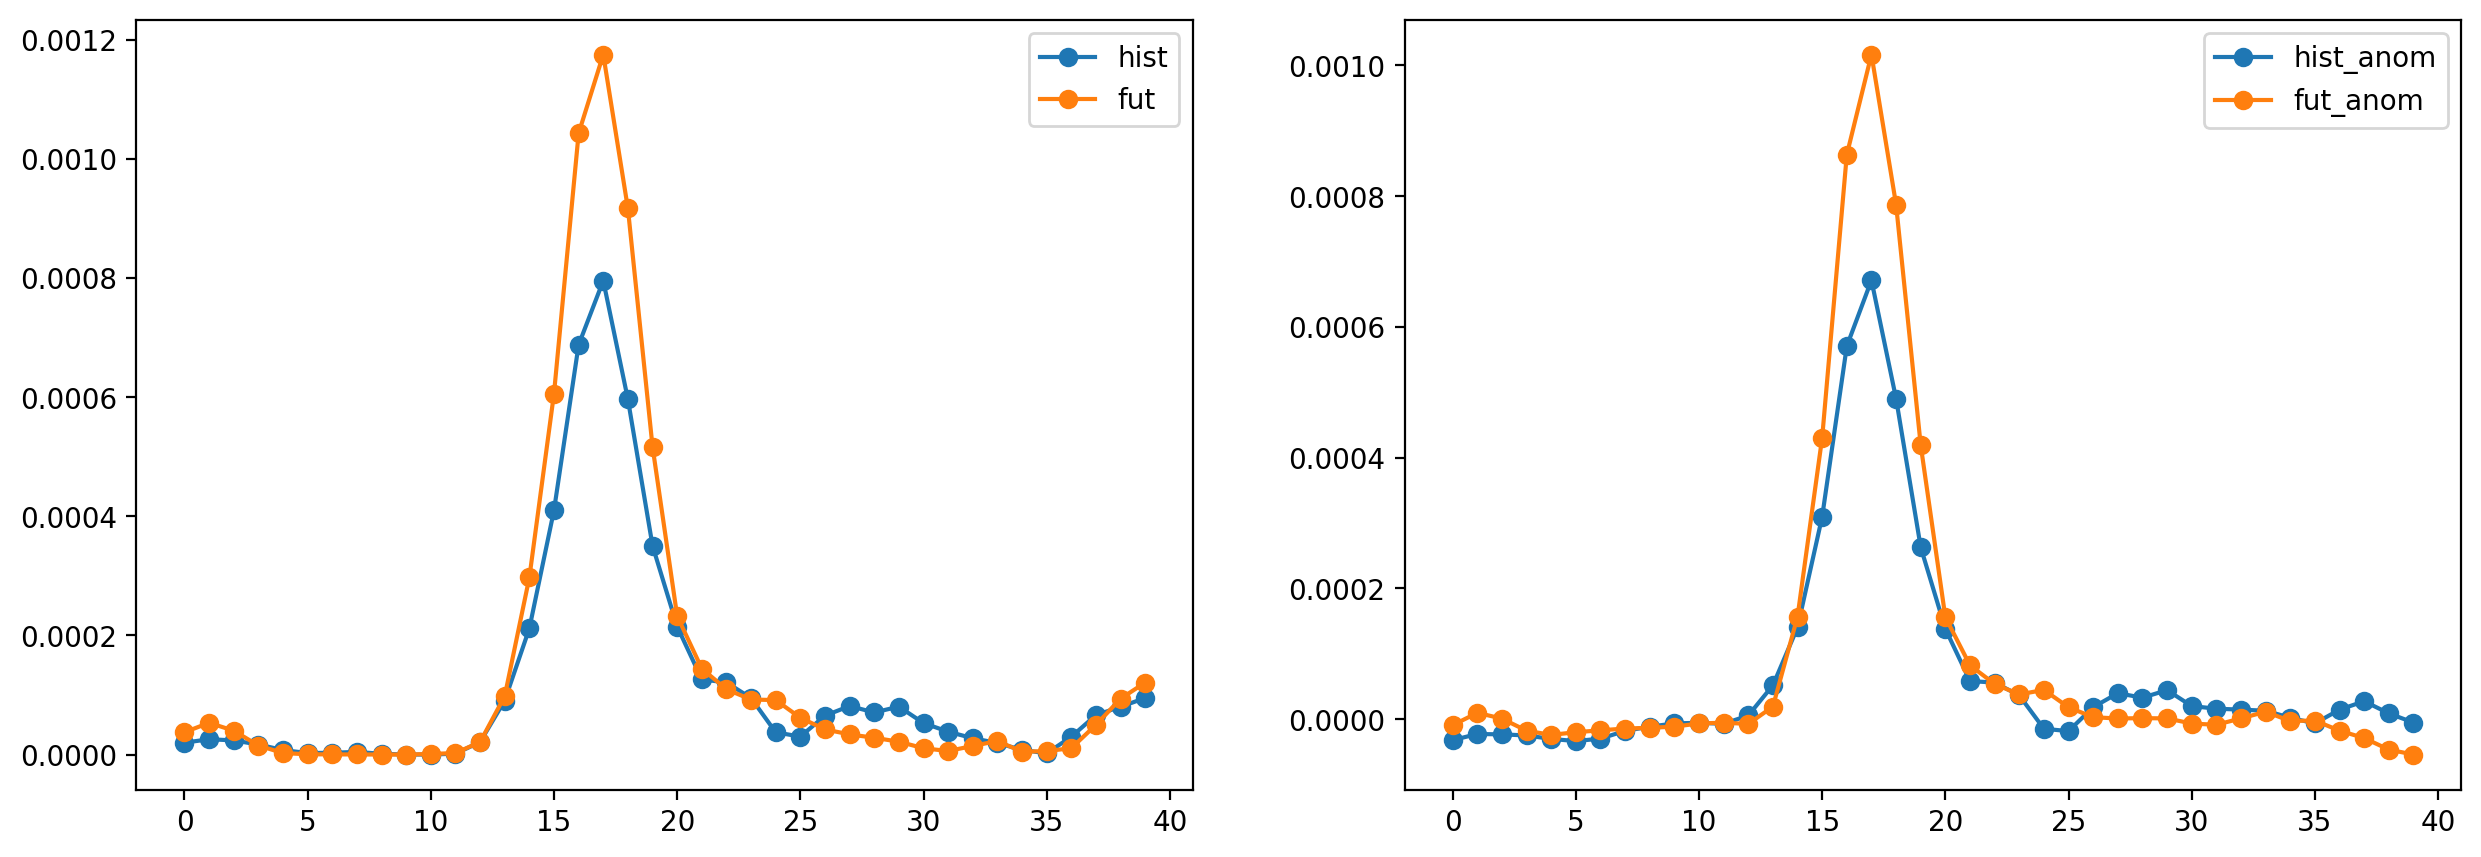

In [29]:
var = 'lsRain'
h = 17
mean = pkl.load(open(glob.glob(basefiles + var + '_timeseries_*_'+str(h)+'.p')[0], 'rb'))
anom = pkl.load(open(glob.glob(basefiles + var + '_anom_timeseries_*_'+str(h)+'.p')[0], 'rb'))
hist = np.mean(mean['CP4hist'], axis=0)[240:280]
fut = np.mean(mean['CP4fut'], axis=0)[240:280]
f=plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(121) 
plt.plot(hist, label='hist', marker='o')
plt.plot(fut, label='fut', marker='o')
plt.legend()


hist = np.mean(anom['CP4hist'], axis=0)[240:280]
fut = np.mean(anom['CP4fut'], axis=0)[240:280]
ax = f.add_subplot(122) 
plt.plot(hist, label='hist_anom', marker='o')
plt.plot(fut, label='fut_anom', marker='o')
plt.legend()

In [53]:
var = 't2'
h = 17
mean = pkl.load(open(glob.glob(basefiles + '/timeseries/' + var + '_timeseries_*_'+str(h)+'.p')[0], 'rb'))
anom = pkl.load(open(glob.glob(basefiles + '/timeseries/' + var + '_anom_timeseries_*_'+str(h)+'.p')[0], 'rb'))
hist = np.mean(mean['CP4hist'], axis=0)
fut = np.mean(mean['CP4fut'], axis=0)
f=plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(121) 
plt.plot(hist, label='hist')
plt.plot(fut, label='fut')
plt.legend()


hist = np.mean(anom['CP4hist'], axis=0)
fut = np.mean(anom['CP4fut'], axis=0)
ax = f.add_subplot(122) 
plt.plot(hist, label='hist_anom')
plt.plot(fut, label='fut_anom')
plt.legend()

IndexError: list index out of range

90
90
80


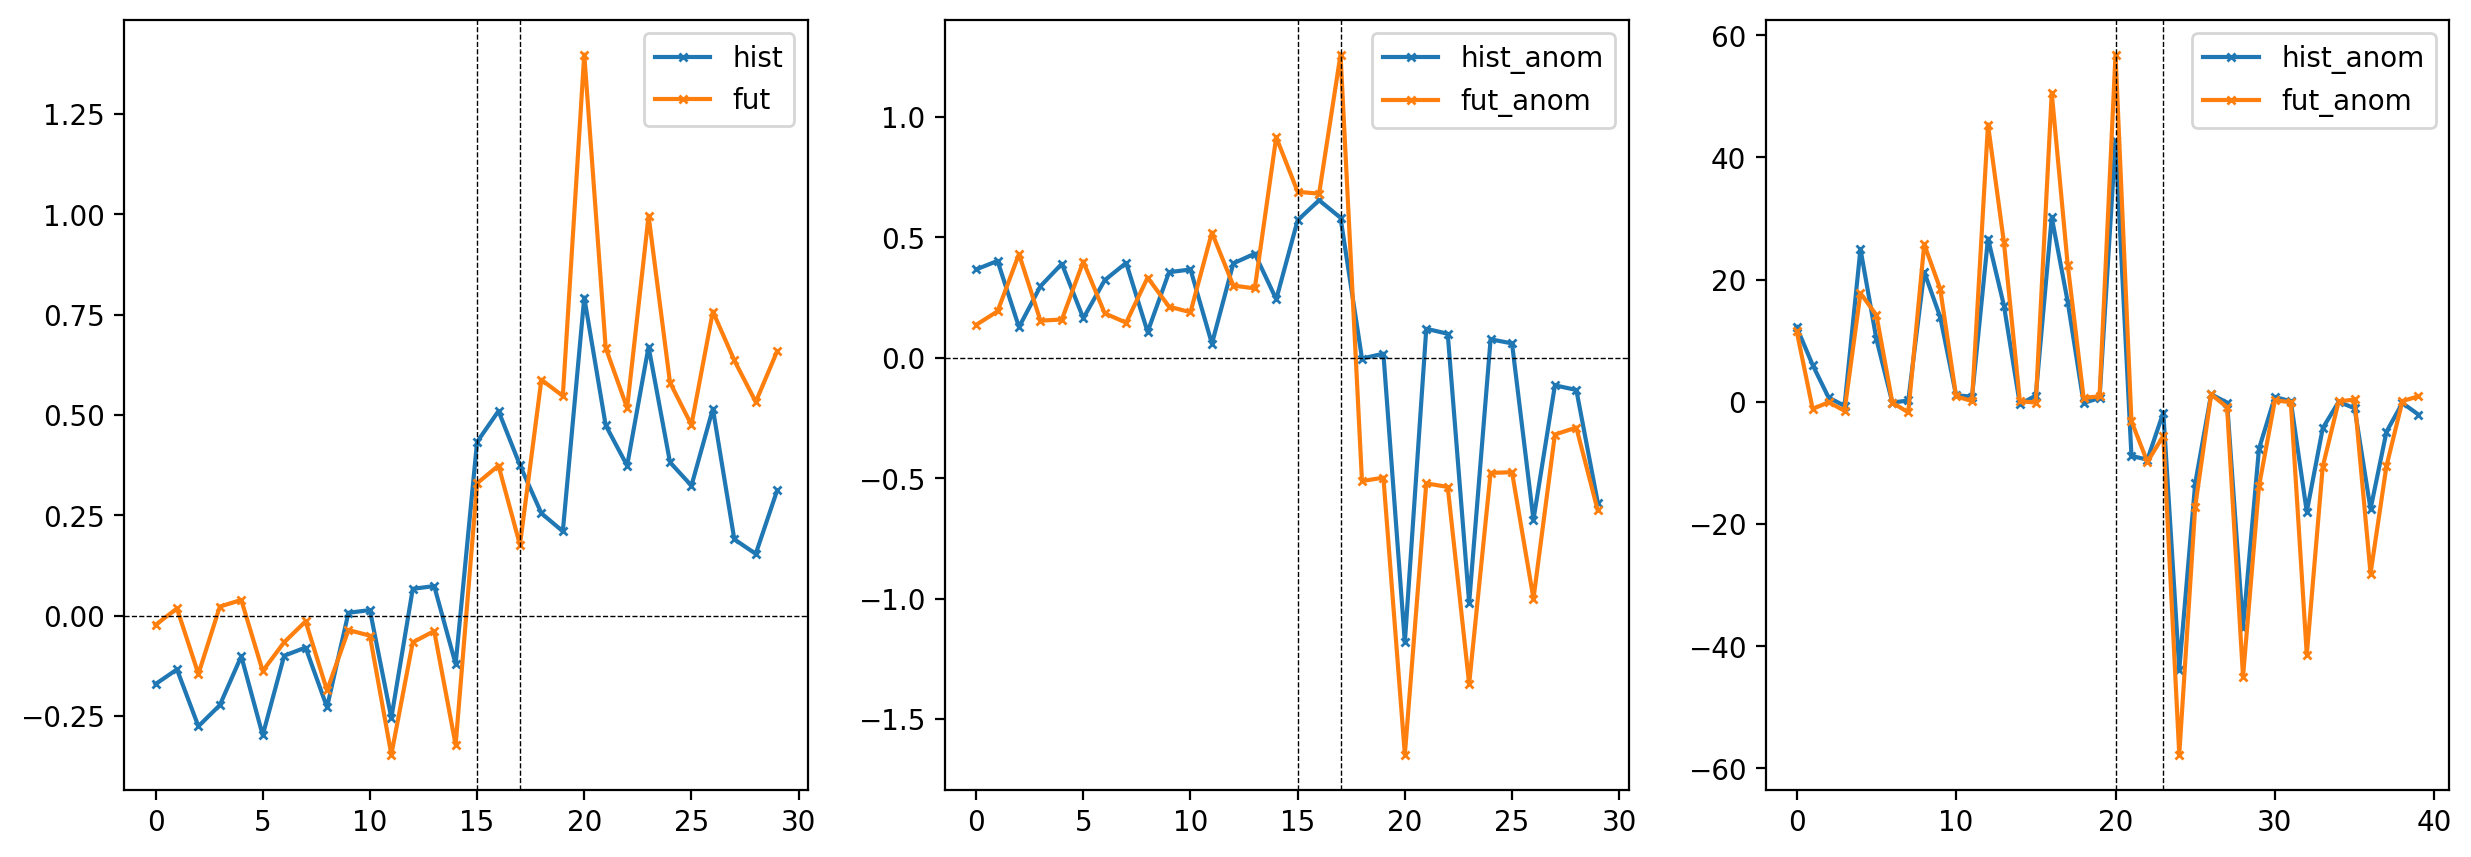

In [190]:
var = 't2'
h = 17
mean = pkl.load(open(glob.glob(basefiles + '/timeseries/' + 'q2' + '_anom_timeseries_*_'+str(h)+'.p')[0], 'rb'))
anom = pkl.load(open(glob.glob(basefiles + '/timeseries/' + var + '_anom_timeseries_*_'+str(h)+'.p')[0], 'rb'))
hist = np.mean(mean['CP4hist'], axis=0)*1000
fut = np.mean(mean['CP4fut'], axis=0)*1000
f=plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(131) 
plt.plot(hist[30:-30], label='hist', marker='x', markersize=3)
plt.plot(fut[30:-30], label='fut', marker='x', markersize=3)
plt.legend()
print(len(fut))
ax.axvline(45-30, linestyle='dashed', linewidth=0.5, color='k')
ax.axvline(45-30+2, linestyle='dashed', linewidth=0.5, color='k')
ax.axhline(0, linestyle='dashed', linewidth=0.5, color='k')


hist = np.mean(anom['CP4hist'], axis=0)
fut = np.mean(anom['CP4fut'], axis=0)
ax = f.add_subplot(132) 
plt.plot(hist[30:-30], label='hist_anom', markersize=3, marker='x')
plt.plot(fut[30:-30], label='fut_anom', markersize=3, marker='x')
plt.legend()
print(len(fut))
ax.axvline(45-30, linestyle='dashed', linewidth=0.5, color='k')
ax.axvline(45-30+2, linestyle='dashed', linewidth=0.5, color='k')
ax.axhline(0, linestyle='dashed', linewidth=0.5, color='k')

anom = pkl.load(open(glob.glob(basefiles + '/timeseries/' + 'sh' + '_anom_timeseries_*_'+str(h)+'.p')[0], 'rb'))
hist = np.mean(anom['CP4hist'], axis=0)
fut = np.mean(anom['CP4fut'], axis=0)
ax = f.add_subplot(133) 
thresh = int(21/3*4)
#ipdb.set_trace()
plt.plot(hist[20:-20], label='hist_anom', markersize=3, marker='x')
plt.plot(fut[20:-20], label='fut_anom', markersize=3, marker='x')

ax.axvline(20, linestyle='dashed', linewidth=0.5, color='k')
ax.axvline(20+3, linestyle='dashed', linewidth=0.5, color='k')
plt.legend()
print(len(fut))
# ax.axvline(45-21, linestyle='dashed', linewidth=0.5, color='k')
# ax.axhline(0, linestyle='dashed', linewidth=0.5, color='k')

(9186, 11, 115)
12.0 48.0
99
135.76450198781714 271.5290039756343


Text(0, 0.5, 'Wavelet coefficient mean')

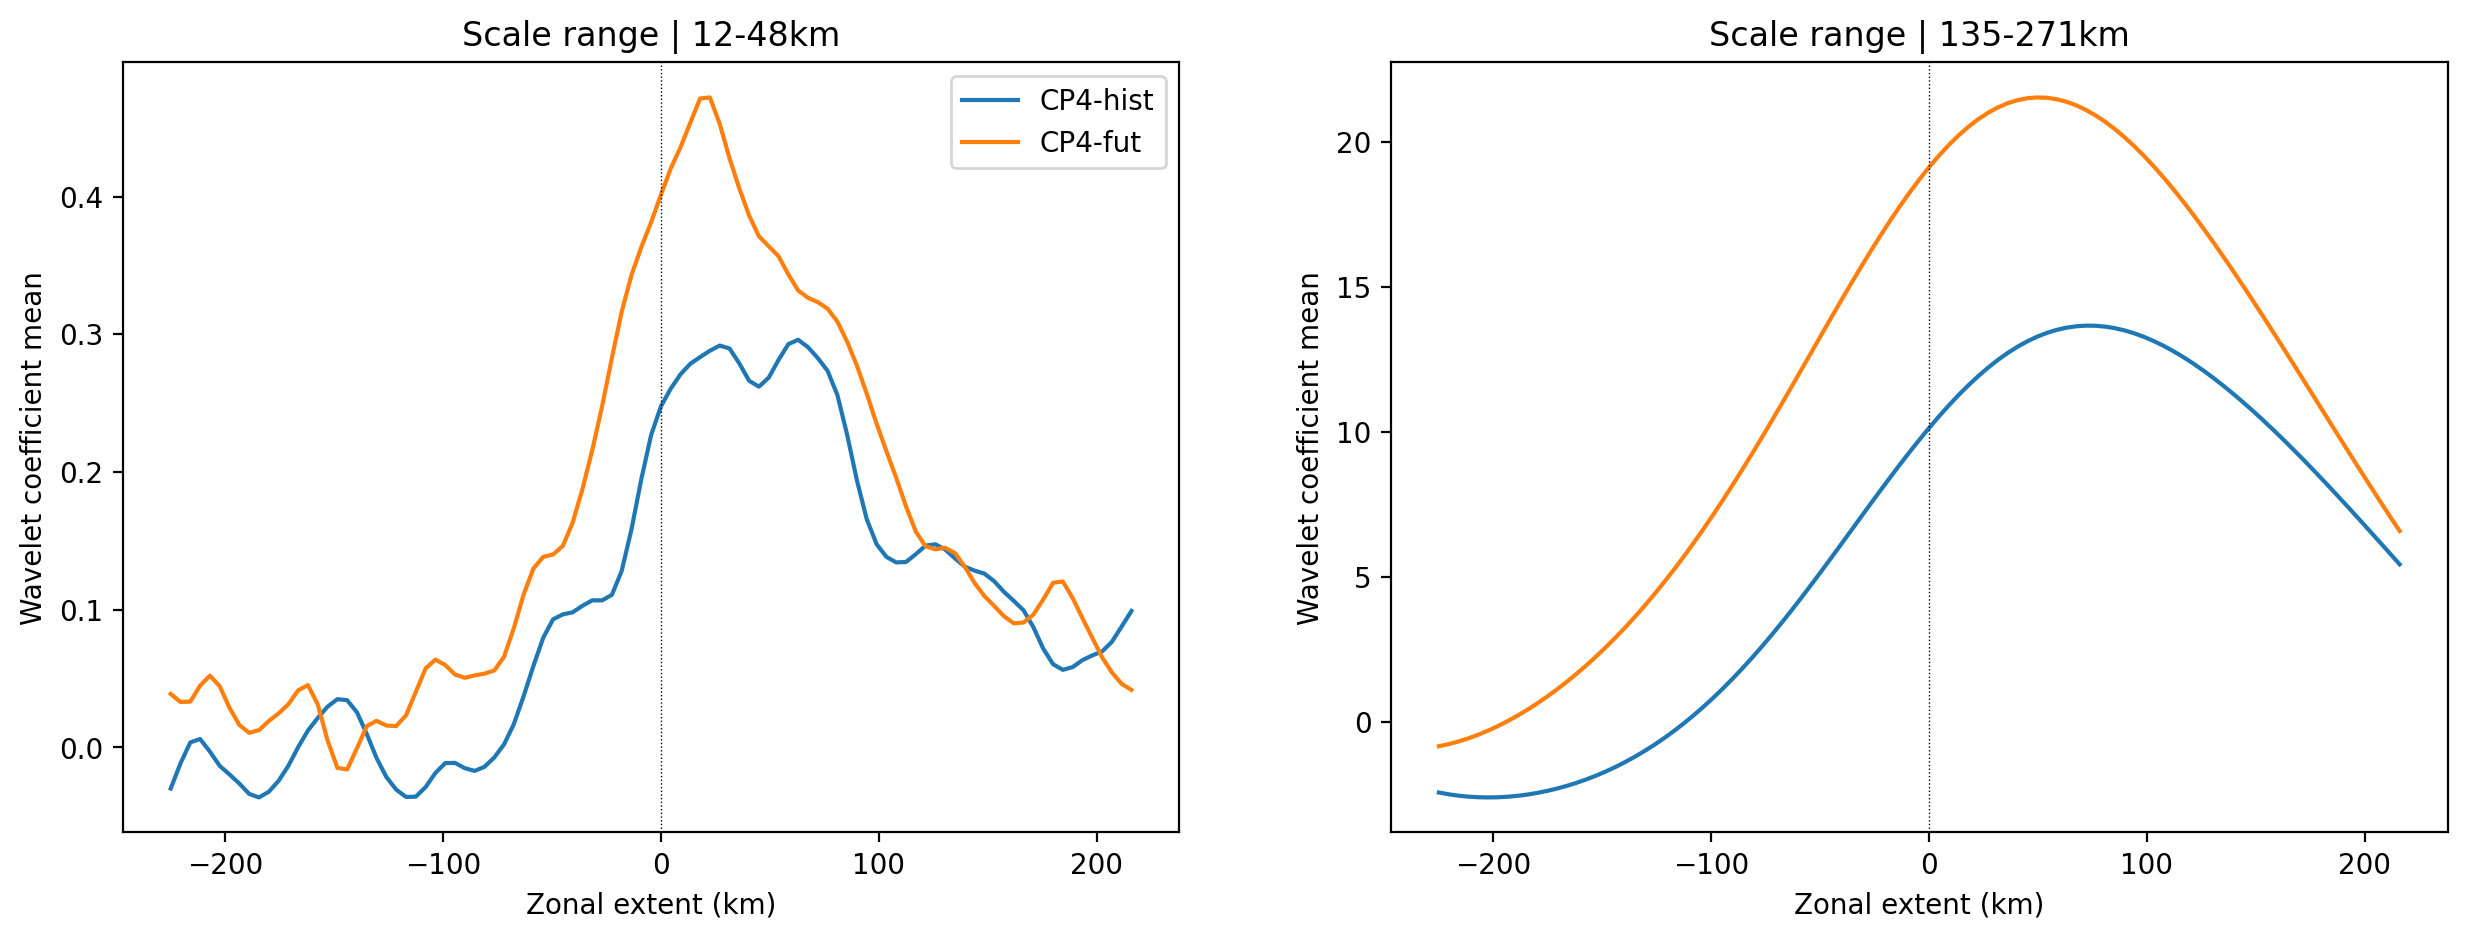

In [328]:
var = 't2'
h = 17
mean = pkl.load(open(glob.glob(basefiles + var + '_wcoeffs_-11to11_'+str(h)+'_2d_xposOnly.p')[0], 'rb'))

print(np.array(mean['CP4hist']).shape)
hist = np.nanmean(mean['CP4hist'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4hist'])
fut = np.nanmean(mean['CP4fut'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4fut'])

scales = mean['scales']

f=plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(121) 
print(mean['scales'][0], mean['scales'][4])
histpart = hist[0:4,:].mean(axis=0)
futpart = fut[0:4,:].mean(axis=0) 
print(len(histpart))
hh = histpart#-histpart[0]
ff = futpart#-futpart[0]
ranges = (np.arange(115))*4.5
plotrange = ranges-ranges[58]

#ax.set_xticklabels()

plt.plot(plotrange[8:-8],hh, label='CP4-hist')
plt.plot(plotrange[8:-8],ff, label='CP4-fut')
plt.title('Scale range | '+str(int(mean['scales'][0]))+'-'+str(int(mean['scales'][4]))+'km') #'+str(hh.max()-hh.min())+' | '+str(ff.max()-ff.min()))
ax.axvline(0, linestyle='dotted', color='k', linewidth=0.5)
ax.set_xlabel('Zonal extent (km)')
ax.set_ylabel('Wavelet coefficient mean')
plt.legend()
    
 
ax = f.add_subplot(122)
    
histpart = hist[-4:-2,:].mean(axis=0)
futpart = fut[-4:-2,:].mean(axis=0)

print(mean['scales'][-4], mean['scales'][-2])

hh = histpart#-histpart[0]
ff = futpart#-futpart[0]

plt.plot(plotrange[8:-8],hh)
plt.plot(plotrange[8:-8],ff)
plt.title('Scale range | '+str(int(mean['scales'][-4]))+'-'+str(int(mean['scales'][-2]))+'km') #'+str(hh.max()-hh.min())+' | '+str(ff.max()-ff.min()))
ax.axvline(0, linestyle='dotted', color='k', linewidth=0.5)
ax.set_xlabel('Zonal extent (km)')
ax.set_ylabel('Wavelet coefficient mean')

(530, 11, 163)
12.0 48.0
163
135.76450198781714 271.5290039756343


Text(0, 0.5, 'Wavelet coefficient mean')

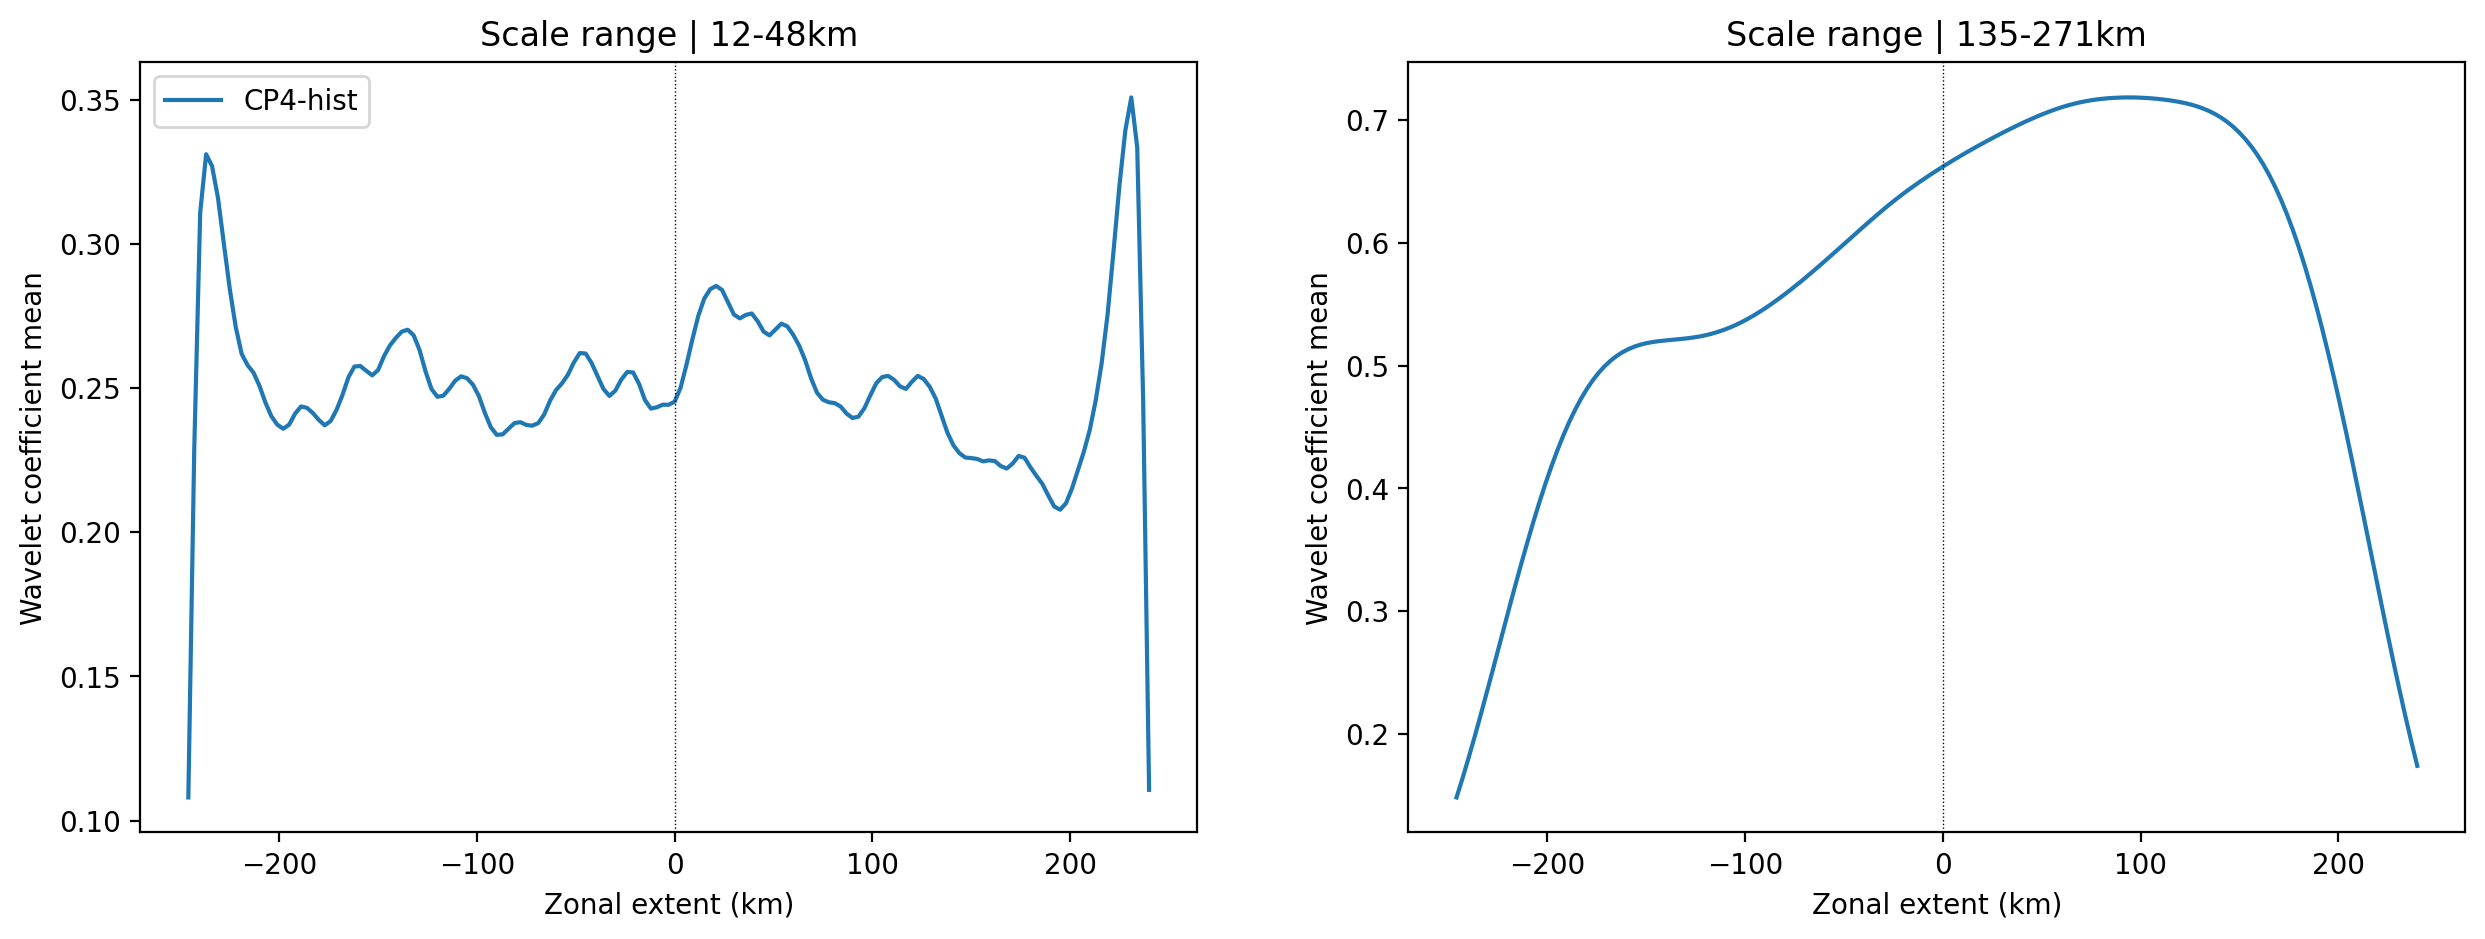

In [322]:
var = 'LSTA'
h = 17
mean = pkl.load(open(glob.glob(basefiles + var + '_power_-11to11_'+str(h)+'_2d_xposOnly.p')[0], 'rb'))

print(np.array(mean['OBS']).shape)
hist = np.nanmean(mean['OBS'], axis=0)

scales = mean['scales']

f=plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(121) 
print(mean['scales'][0], mean['scales'][4])
histpart = hist[0:4,:].mean(axis=0)
print(len(histpart))
hh = histpart#-histpart[0]

ranges = (np.arange(163))*3
plotrange = ranges-ranges[82]

#ax.set_xticklabels()

plt.plot(plotrange,hh, label='CP4-hist')
plt.title('Scale range | '+str(int(mean['scales'][0]))+'-'+str(int(mean['scales'][4]))+'km') #'+str(hh.max()-hh.min())+' | '+str(ff.max()-ff.min()))
ax.axvline(0, linestyle='dotted', color='k', linewidth=0.5)
ax.set_xlabel('Zonal extent (km)')
ax.set_ylabel('Wavelet coefficient mean')
plt.legend()
    
 
ax = f.add_subplot(122)
    
histpart = hist[-4:-2,:].mean(axis=0)


print(mean['scales'][-4], mean['scales'][-2])

hh = histpart#-histpart[0]


plt.plot(plotrange,hh)
plt.title('Scale range | '+str(int(mean['scales'][-4]))+'-'+str(int(mean['scales'][-2]))+'km') #'+str(hh.max()-hh.min())+' | '+str(ff.max()-ff.min()))
ax.axvline(0, linestyle='dotted', color='k', linewidth=0.5)
ax.set_xlabel('Zonal extent (km)')
ax.set_ylabel('Wavelet coefficient mean')

(9186, 11, 115)
(9186, 11, 115)


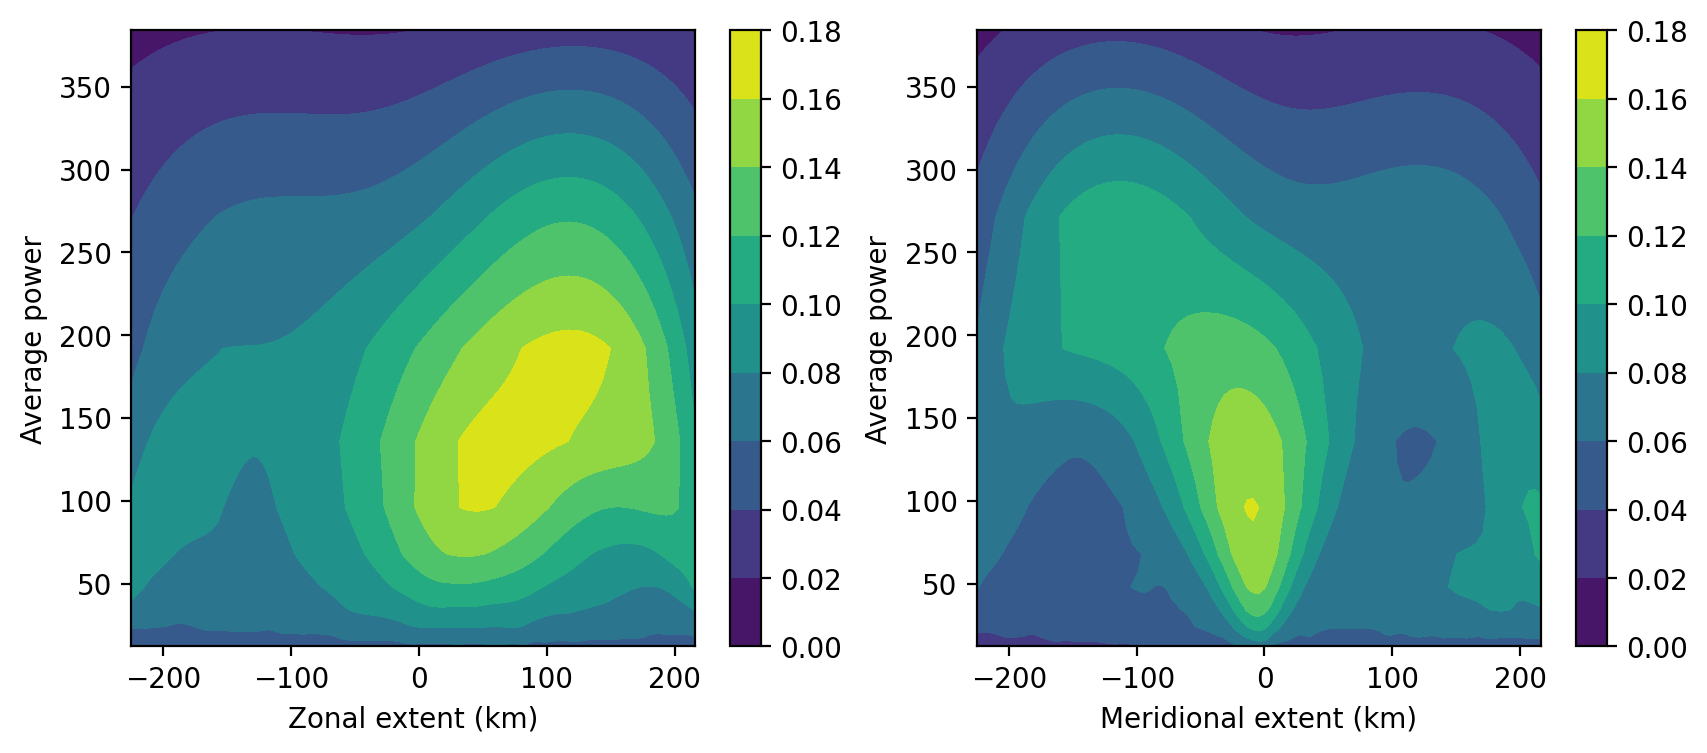

In [329]:
var = 't2'
h = 17
f=plt.figure(figsize=(10,4), dpi=200)

mean = pkl.load(open(glob.glob(basefiles + var + '_power_-11to11_'+str(h)+'_2d_xposOnly.p')[0], 'rb'))

print(np.array(mean['CP4hist']).shape)
hist = np.nanmean(mean['CP4hist'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4hist'])
fut = np.nanmean(mean['CP4fut'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4fut'])

scales = mean['scales']
ranges = (np.arange(115))*4.5
plotrange = ranges-ranges[58]
#ipdb.set_trace()

ax = f.add_subplot(223) 
plt.contourf(plotrange[8:-8], scales, (hist), cmap='viridis')
ax.set_xlabel('Zonal extent (km)')
ax.set_ylabel('Average power')
plt.colorbar()


mean = pkl.load(open(glob.glob(basefiles + var + '_power_-11to11_'+str(h)+'_2d_yposOnly.p')[0], 'rb'))

print(np.array(mean['CP4hist']).shape)
hist = np.nanmean(mean['CP4hist'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4hist'])
fut = np.nanmean(mean['CP4fut'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4fut'])

scales = mean['scales']
ranges = (np.arange(115))*4.5
plotrange = ranges-ranges[58]
#ipdb.set_trace()

ax = f.add_subplot(224) 
plt.contourf(plotrange[8:-8], scales, (hist), cmap='viridis')
ax.set_xlabel('Meridional extent (km)')
ax.set_ylabel('Average power')
plt.colorbar()

(530, 11, 163)
(530, 11, 163)
(9186, 11, 115)
(9186, 11, 115)


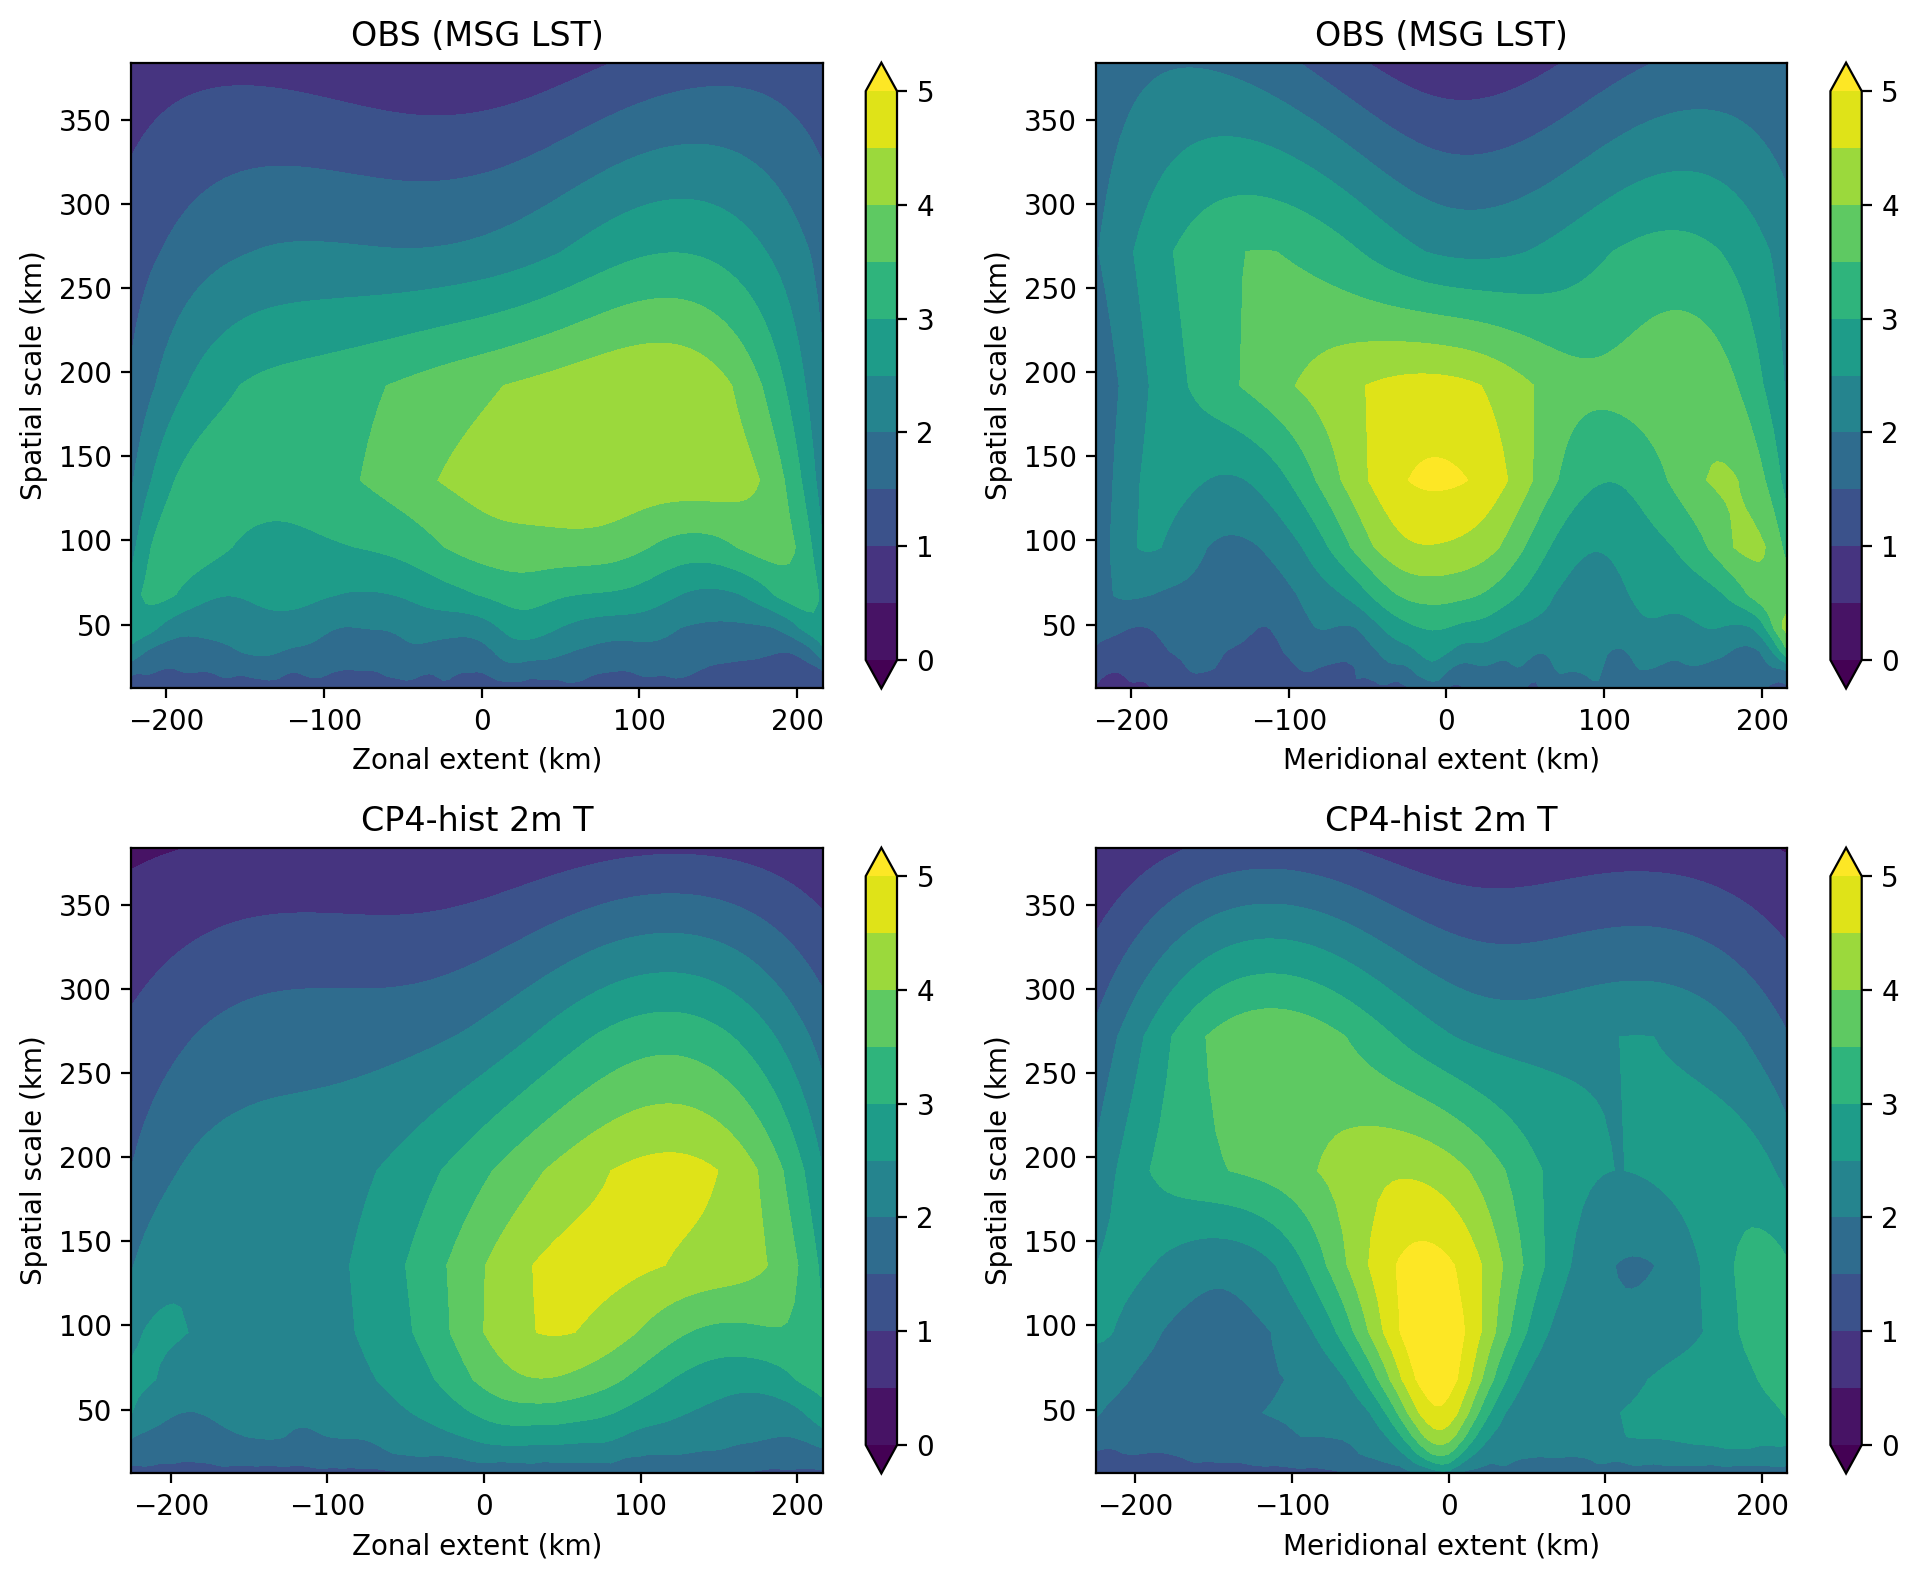

In [342]:
var = 'LSTA'
h = 17
f=plt.figure(figsize=(10,8), dpi=200)

mean = pkl.load(open(glob.glob(basefiles + var + '_power_-11to11_'+str(h)+'_2d_xposOnly.p')[0], 'rb'))

print(np.array(mean['OBS']).shape)
hist = np.nanmean(mean['OBS'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4hist'])


scales = mean['scales']
ranges = (np.arange(163))*3
plotrange = ranges-ranges[82]
#ipdb.set_trace()

ax = f.add_subplot(221) 
plt.contourf(plotrange[8:-8], scales, hist/np.std(hist), cmap='viridis', levels=np.arange(0,5.1, 0.5), extend='both')
ax.set_xlabel('Zonal extent (km)')
ax.set_ylabel('Spatial scale (km)')
plt.colorbar()
plt.title('OBS (MSG LST)')


mean = pkl.load(open(glob.glob(basefiles + var + '_power_-11to11_'+str(h)+'_2d_yposOnly.p')[0], 'rb'))

print(np.array(mean['OBS']).shape)
hist = np.nanmean(mean['OBS'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4hist'])


scales = mean['scales']
ranges = (np.arange(163))*3
plotrange = ranges-ranges[82]
#ipdb.set_trace()

ax = f.add_subplot(222) 
plt.contourf(plotrange[8:-8], scales, hist/np.std(hist), cmap='viridis', levels=np.arange(0,5.1,0.5), extend='both')
ax.set_xlabel('Meridional extent (km)')
ax.set_ylabel('Spatial scale (km)')
plt.colorbar()
plt.title('OBS (MSG LST)')


var = 't2'
#h = 17
#f=plt.figure(figsize=(10,4), dpi=200)

mean = pkl.load(open(glob.glob(basefiles + var + '_power_-11to11_'+str(h)+'_2d_xposOnly.p')[0], 'rb'))

print(np.array(mean['CP4hist']).shape)
hist = np.nanmean(mean['CP4hist'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4hist'])
fut = np.nanmean(mean['CP4fut'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4fut'])

scales = mean['scales']
ranges = (np.arange(115))*4.5
plotrange = ranges-ranges[58]
#ipdb.set_trace()

ax = f.add_subplot(223) 
plt.contourf(plotrange[8:-8], scales, (hist/np.std(hist)), cmap='viridis', levels=np.arange(0,5.1,0.5), extend='both')
ax.set_xlabel('Zonal extent (km)')
ax.set_ylabel('Spatial scale (km)')
plt.colorbar()
plt.title('CP4-hist 2m T')


mean = pkl.load(open(glob.glob(basefiles + var + '_power_-11to11_'+str(h)+'_2d_yposOnly.p')[0], 'rb'))

print(np.array(mean['CP4hist']).shape)
hist = np.nanmean(mean['CP4hist'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4hist'])
fut = np.nanmean(mean['CP4fut'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4fut'])

scales = mean['scales']
ranges = (np.arange(115))*4.5
plotrange = ranges-ranges[58]
#ipdb.set_trace()

ax = f.add_subplot(224) 
plt.contourf(plotrange[8:-8], scales, (hist)/np.std(hist), cmap='viridis', levels=np.arange(0,5.1,0.5), extend='both')
ax.set_xlabel('Meridional extent (km)')
ax.set_ylabel('Spatial scale (km)')
plt.colorbar()
plt.title('CP4-hist 2m T')

plt.tight_layout()
f.savefig('/home/ck/DIR/cornkle/figs/LMCS/CP4_PNASstudy/MSG_CPhist_wavCoeffs_perStorm.jpg')

(1000, 11, 115)
99


Text(0, 0.5, 'Wavelet coefficient mean')

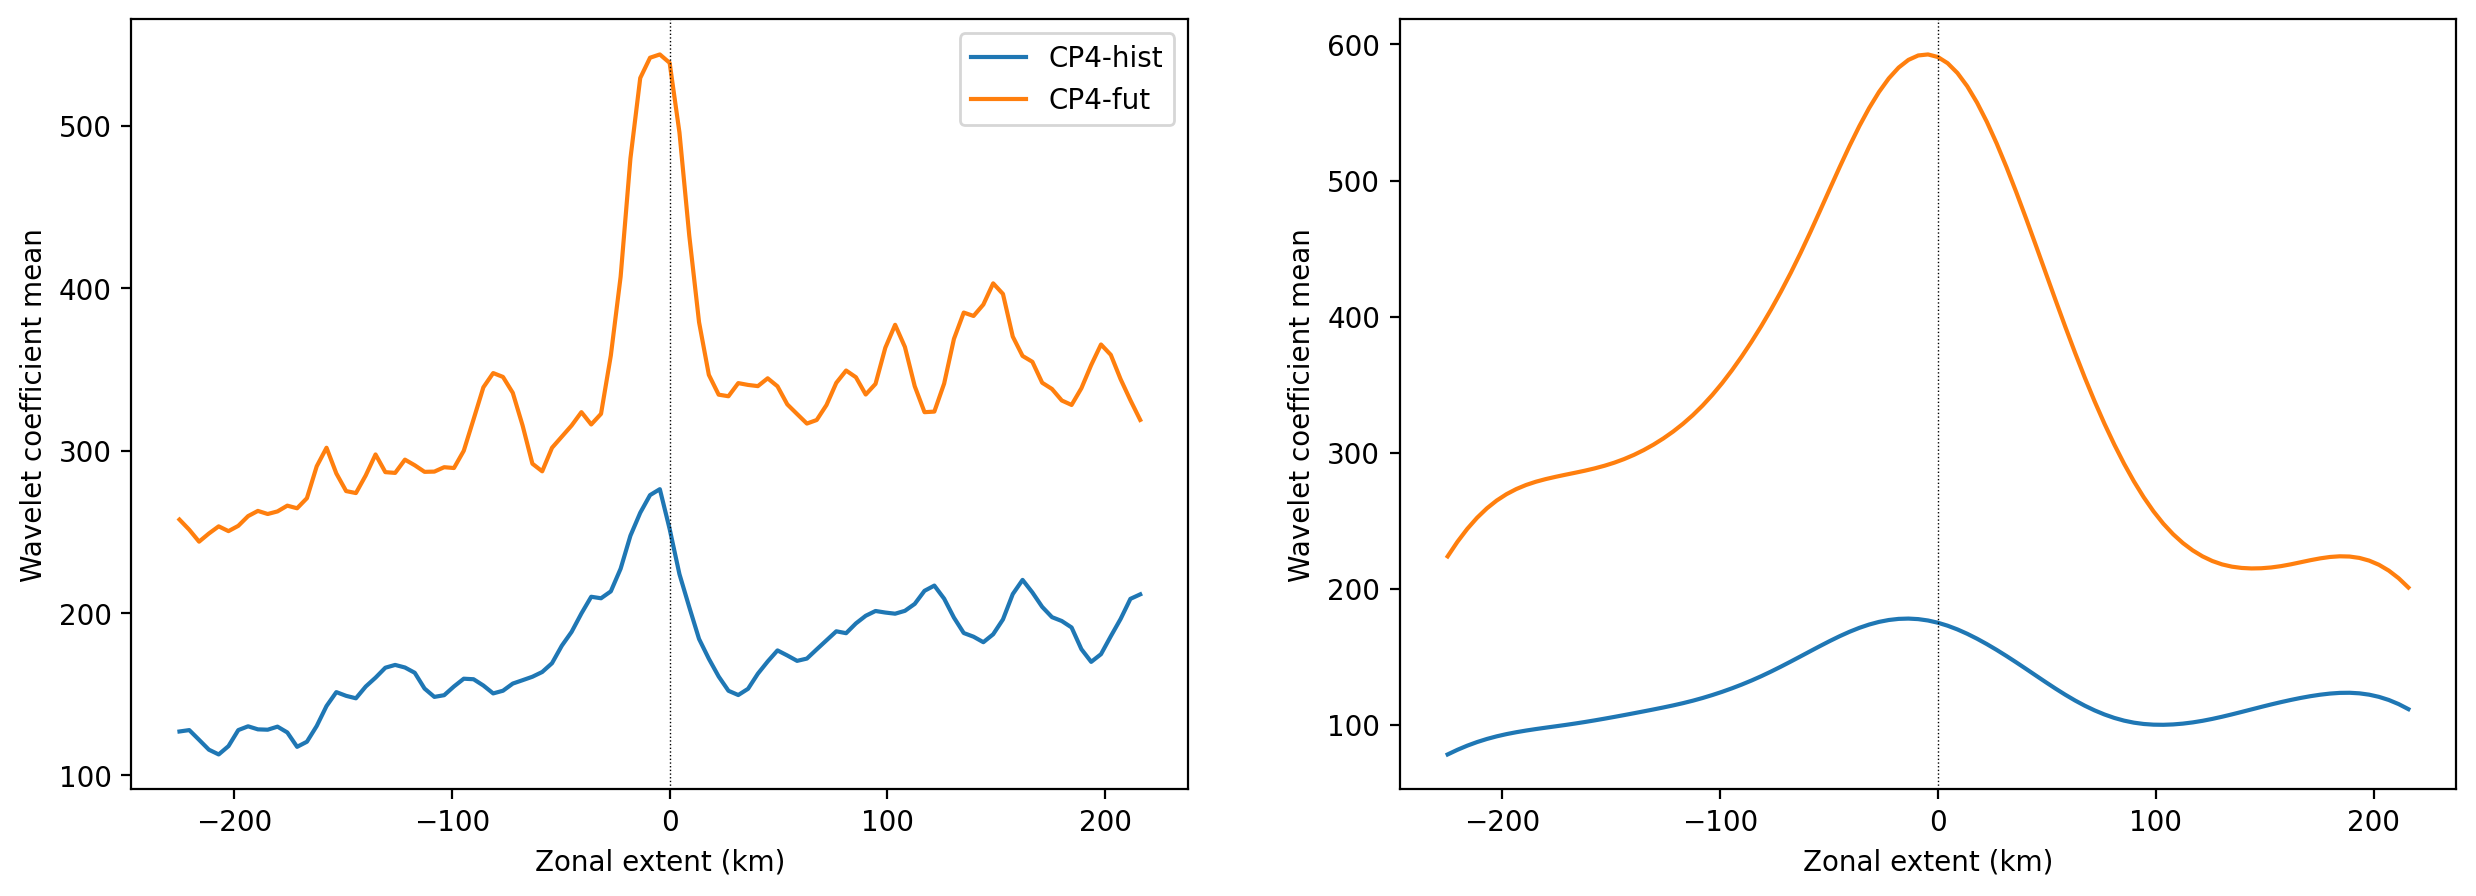

In [154]:
var = 'sh'
h = 17
mean = pkl.load(open(glob.glob(basefiles + var + '_power_-11to11_'+str(h)+'_2d_y.p')[0], 'rb'))
#ipdb.set_trace()
print(np.array(mean['CP4hist']).shape)
hist = np.nanmean(mean['CP4hist'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4hist'])
fut = np.nanmean(mean['CP4fut'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4fut'])

#scales = mean['scales']

f=plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(121) 
#print(mean['scales'][0], mean['scales'][4])
histpart = hist[0:4,:].mean(axis=0)
futpart = fut[0:4,:].mean(axis=0) 
print(len(histpart))
hh = histpart#-histpart[0]
ff = futpart#-futpart[0]
ranges = (np.arange(115))*4.5
plotrange = ranges-ranges[58]

#ax.set_xticklabels()

plt.plot(plotrange[8:-8],hh, label='CP4-hist')
plt.plot(plotrange[8:-8],ff, label='CP4-fut')
#plt.title('Scale range | '+str(int(mean['scales'][0]))+'-'+str(int(mean['scales'][4]))+'km') #'+str(hh.max()-hh.min())+' | '+str(ff.max()-ff.min()))
ax.axvline(0, linestyle='dotted', color='k', linewidth=0.5)
ax.set_xlabel('Zonal extent (km)')
ax.set_ylabel('Wavelet coefficient mean')
plt.legend()
    
 
ax = f.add_subplot(122)
    
histpart = hist[-4:-2,:].mean(axis=0)
futpart = fut[-4:-2,:].mean(axis=0)

#print(mean['scales'][-4], mean['scales'][-2])

hh = histpart#-histpart[0]
ff = futpart#-futpart[0]

plt.plot(plotrange[8:-8],hh)
plt.plot(plotrange[8:-8],ff)
#plt.title('Scale range | '+str(int(mean['scales'][-4]))+'-'+str(int(mean['scales'][-2]))+'km') #'+str(hh.max()-hh.min())+' | '+str(ff.max()-ff.min()))
ax.axvline(0, linestyle='dotted', color='k', linewidth=0.5)
ax.set_xlabel('Zonal extent (km)')
ax.set_ylabel('Wavelet coefficient mean')

(1000, 11, 115)
12.0 48.0
99
135.76450198781714 271.5290039756343


Text(0, 0.5, 'Wavelet coefficient mean')

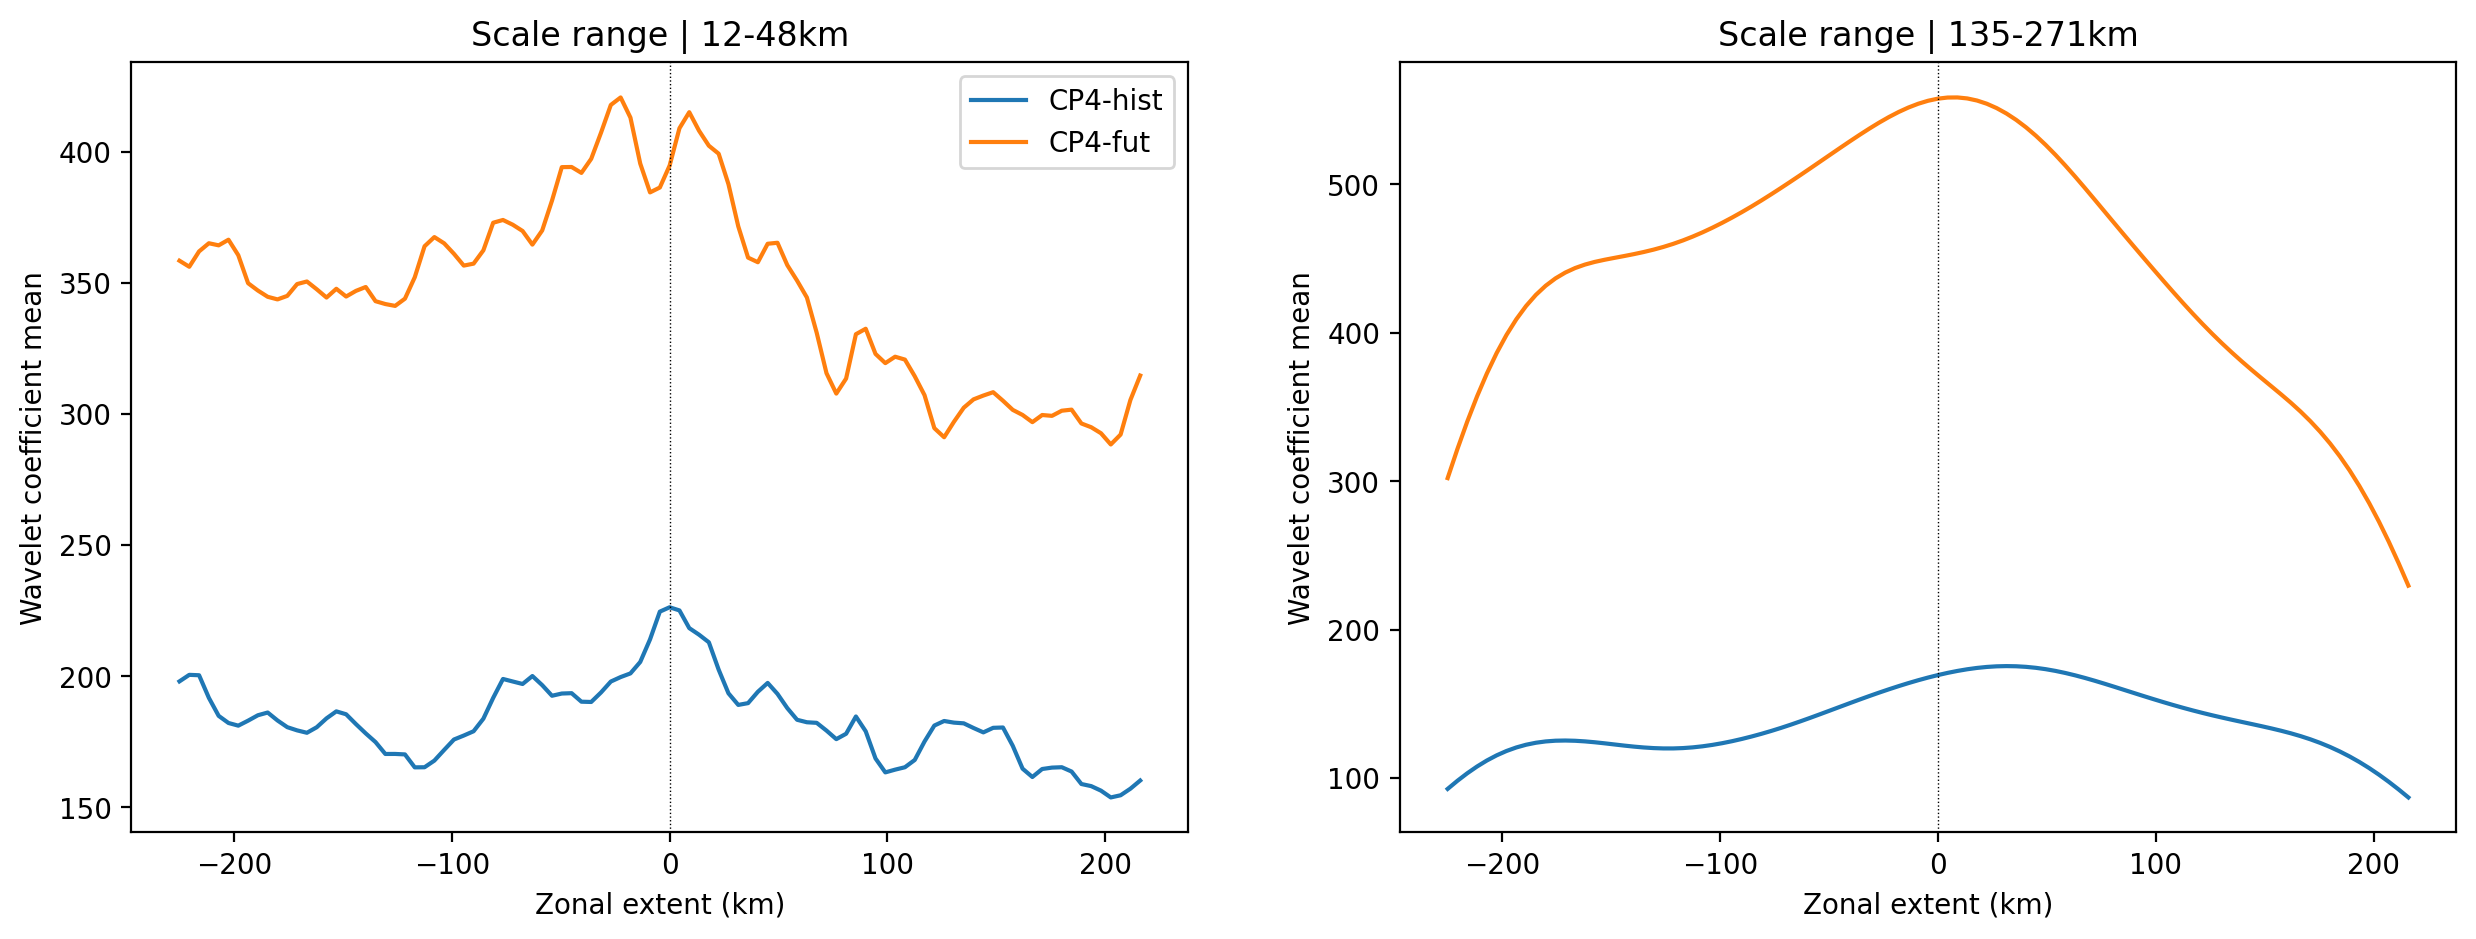

In [159]:
var = 'sh'
h = 17
mean = pkl.load(open(glob.glob(basefiles + var + '_power_-11to11_'+str(h)+'_2d_x.p')[0], 'rb'))

print(np.array(mean['CP4hist']).shape)
hist = np.nanmean(mean['CP4hist'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4hist'])
fut = np.nanmean(mean['CP4fut'], axis=0)[:, 8:-8] #- np.nanmean(mean['CP4fut'])

scales = mean['scales']

f=plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(121) 
print(mean['scales'][0], mean['scales'][4])
histpart = hist[0:4,:].mean(axis=0)
futpart = fut[0:4,:].mean(axis=0) 
print(len(histpart))
hh = histpart#-histpart[0]
ff = futpart#-futpart[0]
ranges = (np.arange(115))*4.5
plotrange = ranges-ranges[58]

#ax.set_xticklabels()

plt.plot(plotrange[8:-8],hh, label='CP4-hist')
plt.plot(plotrange[8:-8],ff, label='CP4-fut')
plt.title('Scale range | '+str(int(mean['scales'][0]))+'-'+str(int(mean['scales'][4]))+'km') #'+str(hh.max()-hh.min())+' | '+str(ff.max()-ff.min()))
ax.axvline(0, linestyle='dotted', color='k', linewidth=0.5)
ax.set_xlabel('Zonal extent (km)')
ax.set_ylabel('Wavelet coefficient mean')
plt.legend()
    
 
ax = f.add_subplot(122)
    
histpart = hist[-4:-2,:].mean(axis=0)
futpart = fut[-4:-2,:].mean(axis=0)

print(mean['scales'][-4], mean['scales'][-2])

hh = histpart#-histpart[0]
ff = futpart#-futpart[0]

plt.plot(plotrange[8:-8],hh)
plt.plot(plotrange[8:-8],ff)
plt.title('Scale range | '+str(int(mean['scales'][-4]))+'-'+str(int(mean['scales'][-2]))+'km') #'+str(hh.max()-hh.min())+' | '+str(ff.max()-ff.min()))
ax.axvline(0, linestyle='dotted', color='k', linewidth=0.5)
ax.set_xlabel('Zonal extent (km)')
ax.set_ylabel('Wavelet coefficient mean')

IndexError: list index out of range

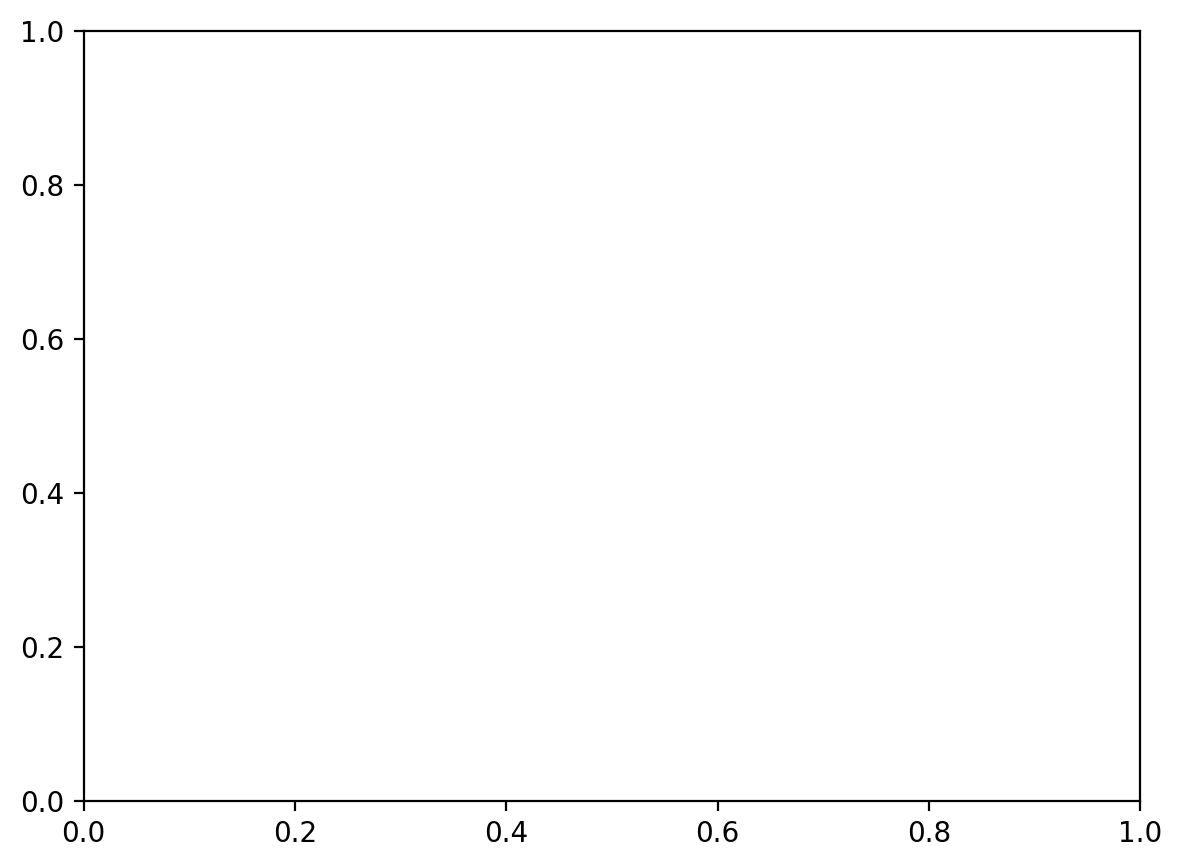

In [199]:
var = 't2'
f=plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(121) 
for vart in [('t2',''), ('q2',''), ('sh',''), ('lh',''), ('tcwv','')]:
    h = 17
    var=vart[0]
    tag = vart[1]
    mean = pkl.load(open(glob.glob(basefiles + var + '_power_fullDomain_'+str(h)+tag+'.p')[0], 'rb'))
    #ipdb.set_trace()
    #scales = pkl.load(open(glob.glob(basefiles + var + '_wcoeffs_fullDomain_'+str(h)+'.p')[0], 'rb'))['scales']
    hist = np.array(mean['CP4hist'])#[:,:,50:150,100:650]
    scales = np.array(mean['scales'])
    shapes = hist.shape
    print(shapes)
    hist = hist.mean(axis=(0,2,3))#sum(axis=0).sum(axis=1)
    fut = np.array(mean['CP4fut'])#[:,:,50:150,100:650]
    fut = fut.mean(axis=(0,2,3))#.sum(axis=0).sum(axis=1)

    
    ax.plot(scales, ((fut-hist)/hist)*100, label=var, marker='o')
    
    if vart[0] == 'tcwv':
        ax1 = f.add_subplot(122) 
        plt.plot(scales, (hist), label=var, marker='o')
        plt.plot(scales, (fut), label=var, marker='o')

ax.legend()
ax.set_xlabel('Scales (km)')
ax.set_ylabel('Future change in power versus historical (%)')

(60, 11)
(60, 11)
(60, 11)
(60, 11)


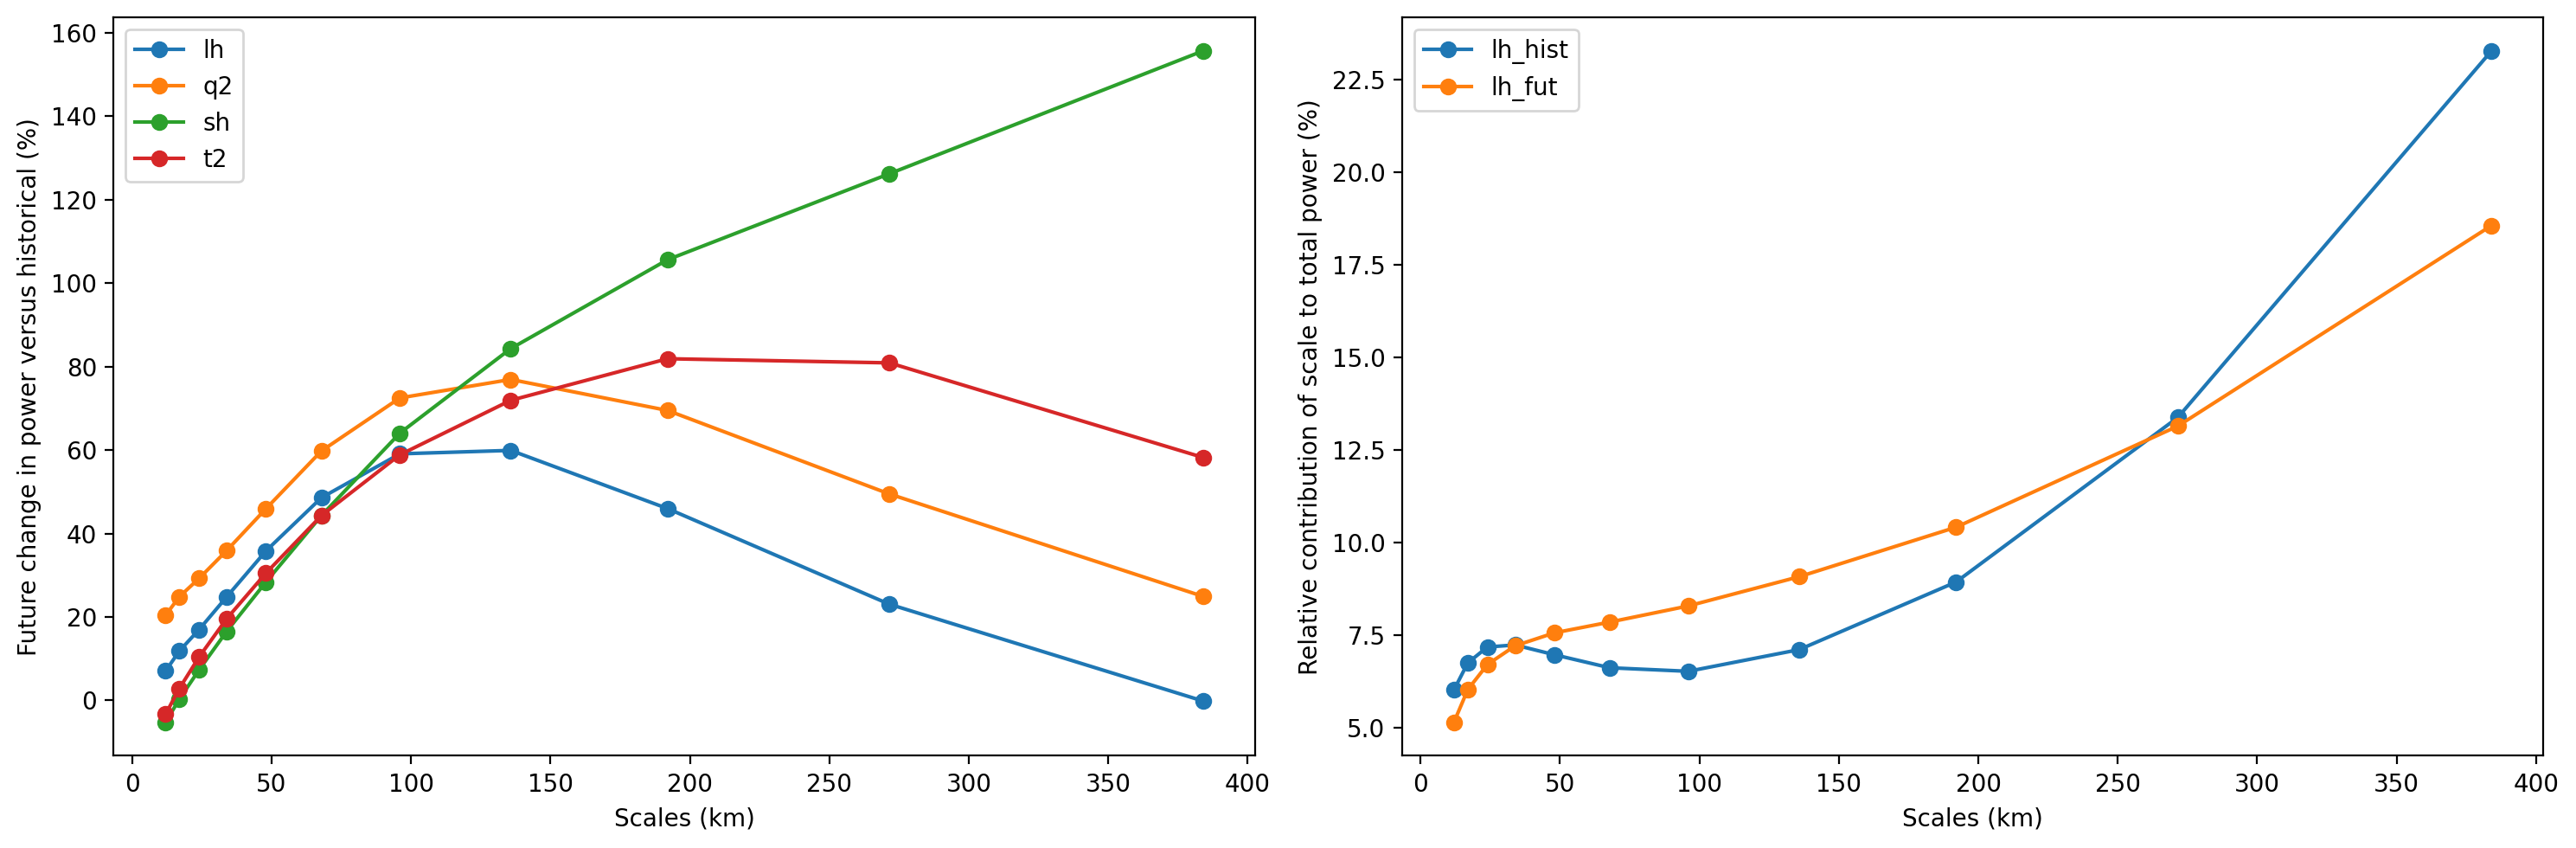

In [341]:

f=plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(121) 
ax1 = f.add_subplot(122) 
for vart in [('lh',''), ('q2',''), ('sh',''),('t2','')]:#, ('tcwv','')]:
    h = 17
    var=vart[0]
    tag = vart[1]
    mean = pkl.load(open(glob.glob(basefiles + var + '_power_fullDomain_'+str(h)+tag+'_posOnly.p')[0], 'rb'))
    #ipdb.set_trace()
    #scales = pkl.load(open(glob.glob(basefiles + var + '_wcoeffs_fullDomain_'+str(h)+'.p')[0], 'rb'))['scales']
    hist = np.array(mean['CP4hist'])#[:,:,50:150,100:650]
    scales = np.array(mean['scales'])
    shapes = hist.shape
    print(shapes)
    hist = hist.mean(axis=(0))#sum(axis=0).sum(axis=1)
    fut = np.array(mean['CP4fut'])#[:,:,50:150,100:650]
    fut = fut.mean(axis=(0))#.sum(axis=0).sum(axis=1)

    ax.plot(scales, ((fut-hist)/hist)*100, label=var, marker='o')
    

    if vart[0] in ['lh']:
        ax1.plot(scales, (hist)/np.sum(hist)*100, label=var+'_hist', marker='o')
        ax1.plot(scales, (fut)/np.sum(fut)*100, label=var+'_fut', marker='o')
        ax1.set_ylabel('Relative contribution of scale to total power (%)')
        ax1.set_xlabel('Scales (km)')

ax.legend()
ax1.legend()
ax.set_xlabel('Scales (km)')
ax.set_ylabel('Future change in power versus historical (%)')
plt.tight_layout()
f.savefig('/home/ck/DIR/cornkle/figs/LMCS/CP4_PNASstudy/fullDomain_CP4fut-CP4hist.jpg')

(60, 11)


Text(0, 0.5, 'Future change in power versus historical (%)')

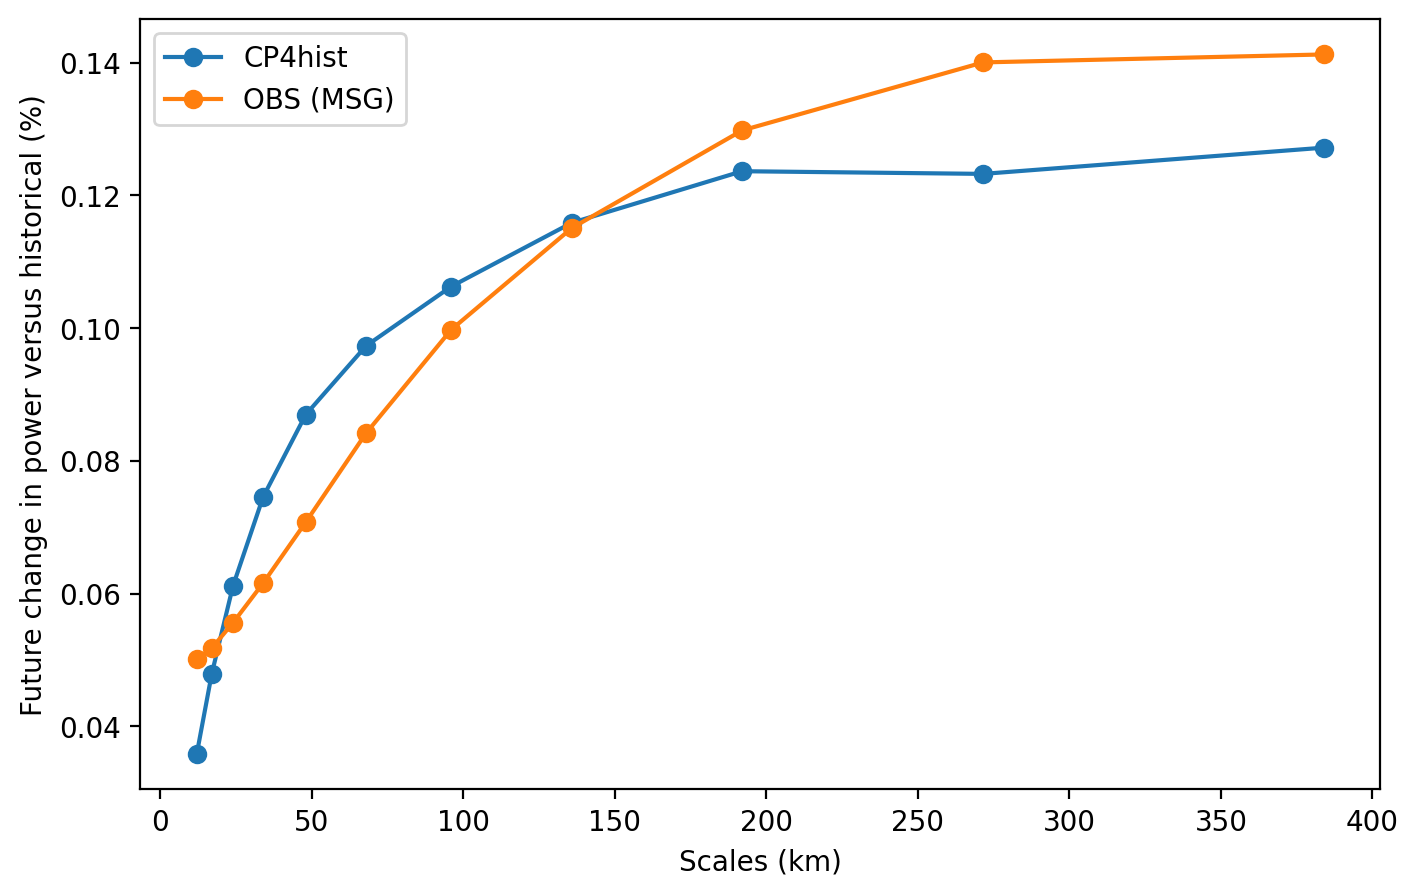

In [311]:

f=plt.figure(figsize=(8,5), dpi=200)
ax = f.add_subplot(111) 
for vart in [('t2','')]:#, ('sh',''), ('lh',''), ('tcwv','')]:
    h = 17
    var=vart[0]
    tag = vart[1]
    mean = pkl.load(open(glob.glob(basefiles + var + '_power_fullDomain_'+str(h)+tag+'_posOnly.p')[0], 'rb'))
    #obs = pkl.load(open(glob.glob(basefiles + 'OBS_LSTA_power_fullDomain_'+str(h)+tag+'_negOnly.p')[0], 'rb'))
    obsp = pkl.load(open(glob.glob(basefiles + 'OBS_LSTA_power_fullDomain_'+str(h)+tag+'_posOnly.p')[0], 'rb'))
    #ipdb.set_trace()
    #scales = pkl.load(open(glob.glob(basefiles + var + '_wcoeffs_fullDomain_'+str(h)+'.p')[0], 'rb'))['scales']
    hist = np.array(mean['CP4hist'])
    scales = np.array(mean['scales'])
    shapes = hist.shape
    print(shapes)
    hist = hist.mean(axis=(0))
    #obss = np.array(obs['OBS']).mean(axis=0)
    obssp = np.array(obsp['OBS']).mean(axis=0)

    ax.plot(scales, hist/np.sum(hist), label='CP4hist', marker='o')
    #ax.plot(scales, obss/np.sum(obss), label='OBS (MSG)', marker='o')
    ax.plot(scales, obssp/np.sum(obssp), label='OBS (MSG)', marker='o')
    

ax.legend()
ax.set_xlabel('Scales (km)')
ax.set_ylabel('Future change in power versus historical (%)')

(40, 11)


Text(0, 0.5, 'Future change in power versus historical (%)')

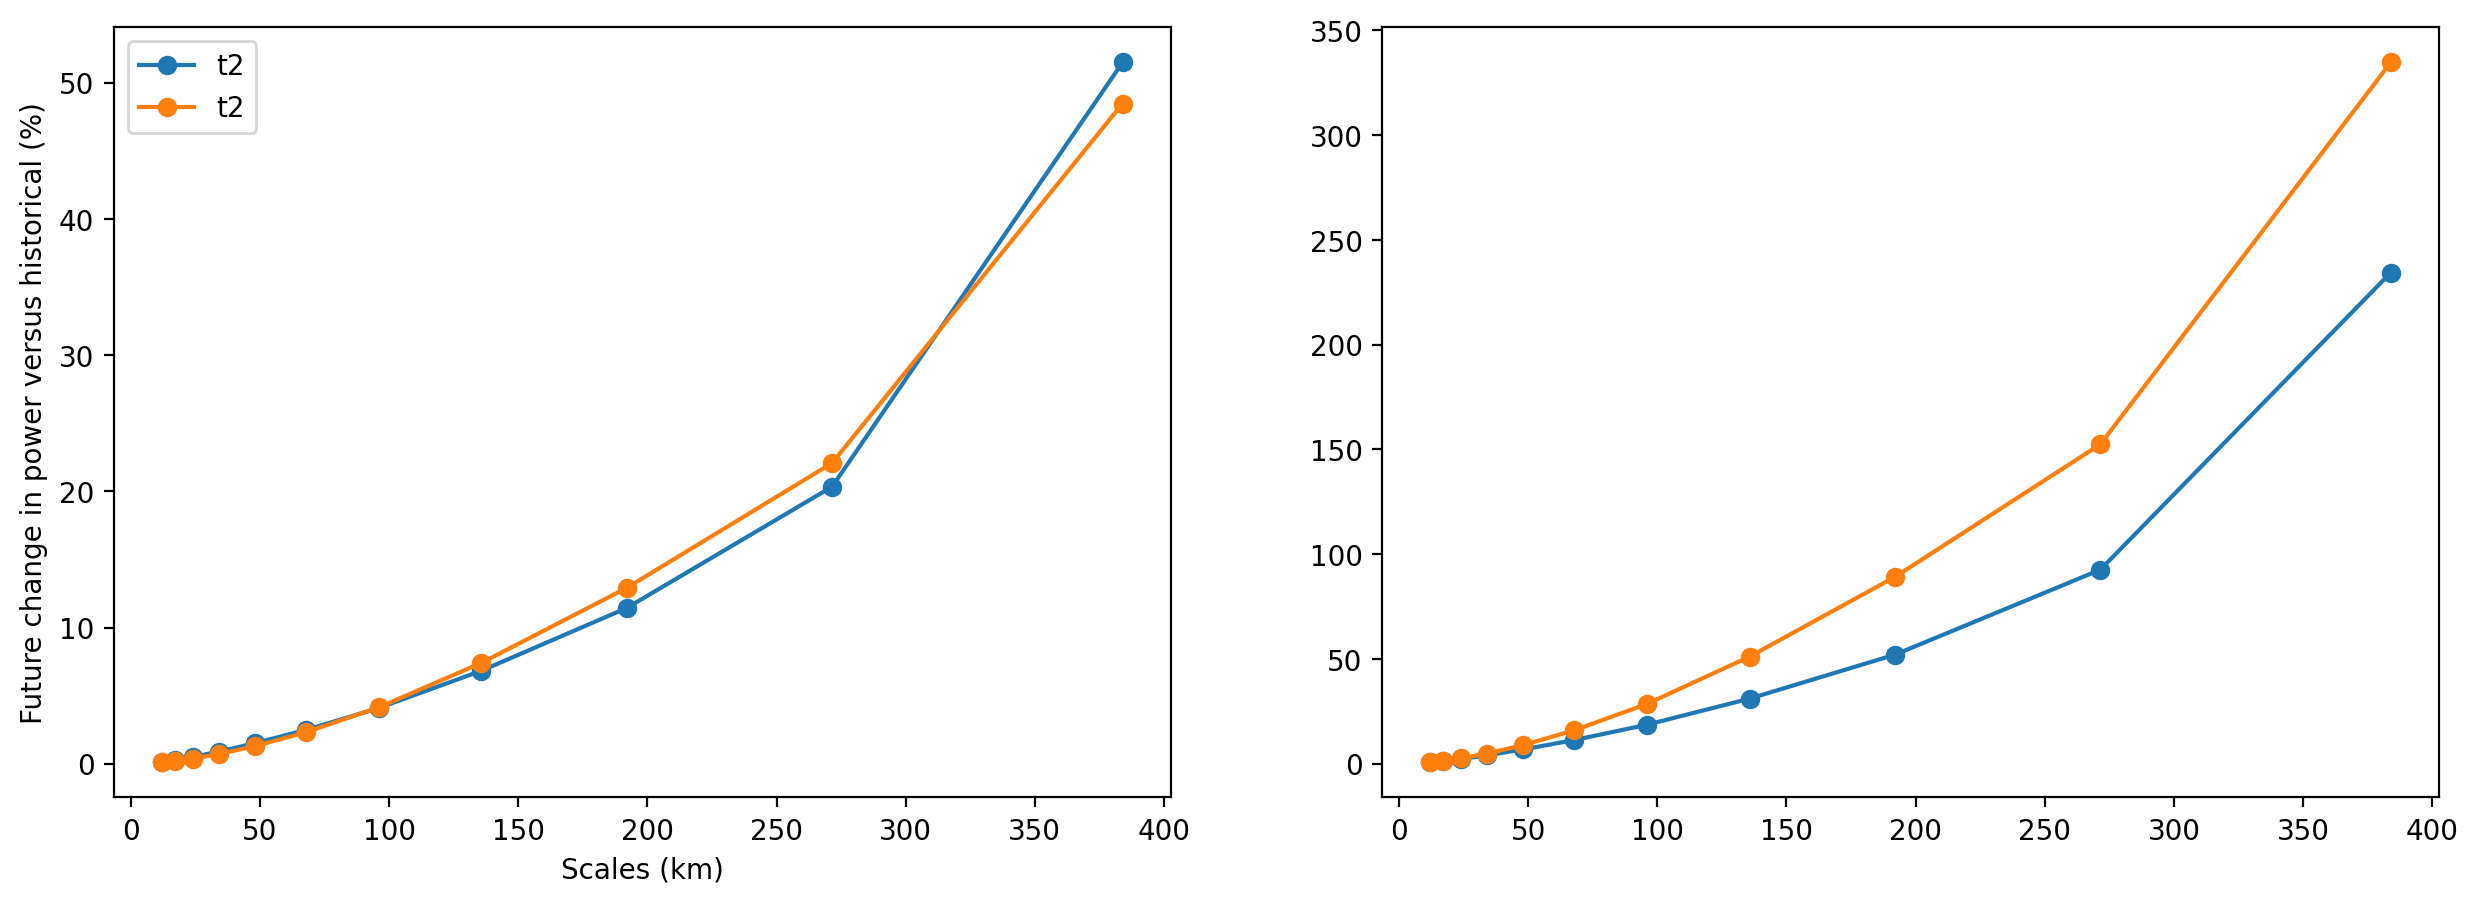

In [50]:
var = 't2'
f=plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(121) 
for vart in [('t2','')]:
    h = 17
    var=vart[0]
    tag = vart[1]
    mean = pkl.load(open(glob.glob(basefiles + var + '_power_fullDomain_'+str(h)+tag+'.p')[0], 'rb'))
    #ipdb.set_trace()
    #scales = pkl.load(open(glob.glob(basefiles + var + '_wcoeffs_fullDomain_'+str(h)+'.p')[0], 'rb'))['scales']
    hist = np.array(mean['CP4hist'])#[:,:,50:150,100:650]
    scales = np.array(mean['scales'])
    shapes = hist.shape
    print(shapes)
    hist = hist.mean(axis=(0))#sum(axis=0).sum(axis=1)
    fut = np.array(mean['CP4fut'])#[:,:,50:150,100:650]
    fut = fut.mean(axis=(0))#.sum(axis=0).sum(axis=1)

    ax.plot(scales, (hist)/np.sum(hist)*100, label=var, marker='o')
    ax.plot(scales, (fut)/np.sum(fut)*100, label=var, marker='o')
    
    if vart[0] == 't2':
        ax1 = f.add_subplot(122) 
        plt.plot(scales, (hist), label=var, marker='o')
        plt.plot(scales, (fut), label=var, marker='o')

ax.legend()
ax.set_xlabel('Scales (km)')
ax.set_ylabel('Future change in power versus historical (%)')

(198, 592)


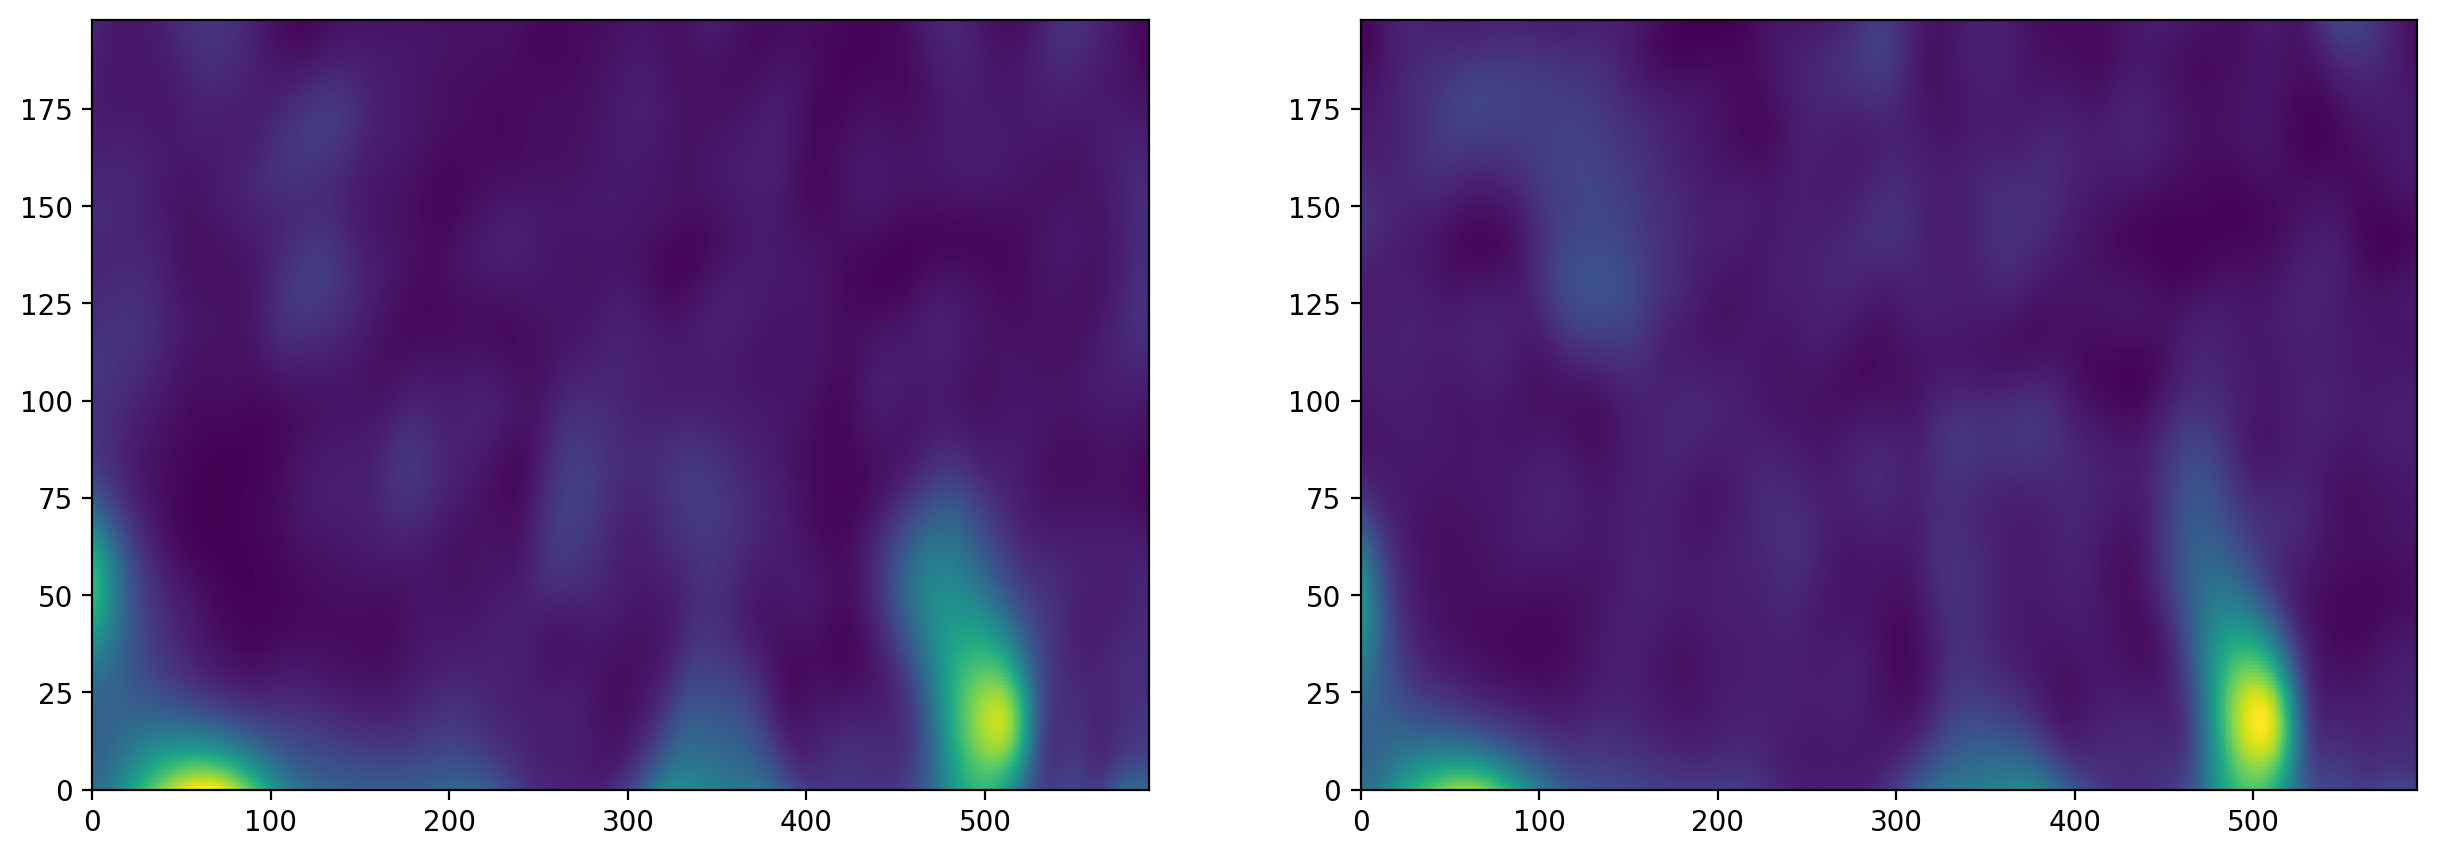

In [42]:
h = 17
var='t2'
tag=''
   
mean = pkl.load(open(glob.glob(basefiles + var + '_power_fullDomain_'+str(h)+tag+'.p')[0], 'rb'))
hist = np.array(mean['CP4hist'])[0:30,-4:-1,:,:]
hist = hist.mean(axis=(0,1))#sum(axis=0).sum(axis=1)
fut = np.array(mean['CP4fut'])[0:30,-4:-1,:,:]
fut = fut.mean(axis=(0,1))#.sum(axis=0).sum(axis=1)

scales = np.array(mean['scales'])
shapes = hist.shape
print(shapes)

f=plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(121) 
plt.pcolormesh(hist, label='hist')

ax = f.add_subplot(122) 
plt.pcolormesh(fut, label='hist')



In [9]:
var = 'q2'
h = 17
mean = pkl.load(open(glob.glob(basefiles + var + '_power_fullDomain_'+str(h)+'.p')[0], 'rb'))
#ipdb.set_trace()
#scales = pkl.load(open(glob.glob(basefiles + var + '_wcoeffs_fullDomain_'+str(h)+'.p')[0], 'rb'))['scales']
hist = np.array(mean['CP4hist'])[:,:,:,90::]
scales = np.array(mean['scales'])
shapes = hist.shape
print(shapes)
hist = hist.mean(axis=(0,2,3))#sum(axis=0).sum(axis=1)
fut = np.array(mean['CP4fut'])[:,:,:,90::]
fut = fut.mean(axis=(0,2,3))#.sum(axis=0).sum(axis=1)

f=plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(121) 
plt.plot(scales, ((fut-hist)/hist)*100, label='hist', marker='o')

plt.legend()
ax.set_xlabel('Scales (km)')
ax.set_ylabel('Future change in power versus historical (%)')

IndexError: list index out of range

In [225]:
futarr = np.array(mean['CP4fut'])

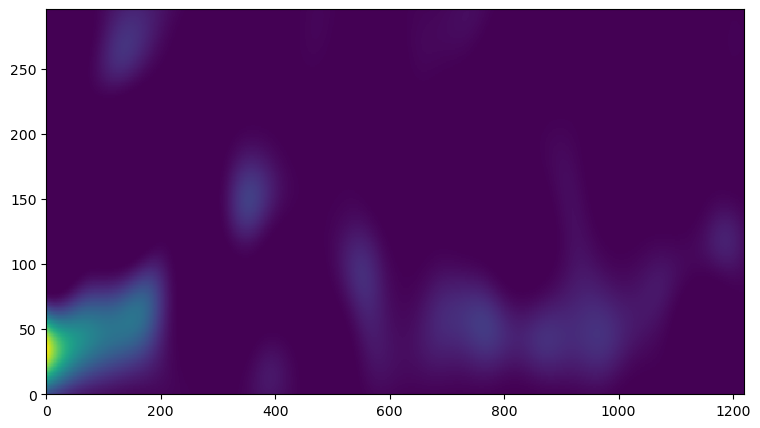

In [231]:
f = plt.figure(figsize=(9,5))
ax = f.add_subplot(111)
ax.pcolormesh(histarr[0,-1,:,90::])

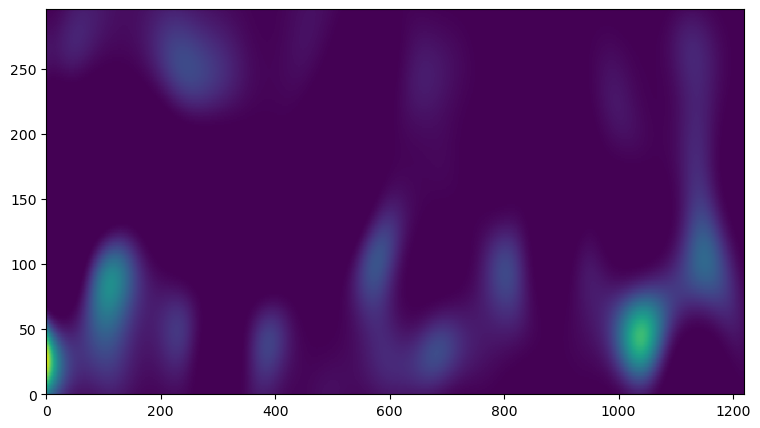

In [232]:
f = plt.figure(figsize=(9,5))
ax = f.add_subplot(111)
ax.pcolormesh(futarr[0,-1,:,90::])